In [1]:
# Import that good good
import sys
import os
sys.path.append('/Users/kolbt/Desktop/ipython/diam_files')
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import math
from IPython.display import display
from collections import OrderedDict
pd.options.display.max_rows = 2
import matplotlib.colors as mc
import colorsys
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit
# Figure dimensions (inches)
# 2 x 1.8

In [2]:
#Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
# Functions will all go here
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)

def plotter(start, stop, ylab):
    "Plotting function so that I don't have to show this a zillion times"
    ind = 0
    ymin = None
    ymax = None
    for j in range(start, stop):
        for i in range(0, len(SS[headers[j]])):
            # Mixture
            if params['xA'][i] % 100 != 0:
                plt.scatter(params['peR'][i], SS[headers[j]][i], c=col[ind], label=headers[j])
            # Monodisperse, always same color
            else:
                # If it's zero ignore it
                if SS[headers[j]][i] != 0:
                    plt.scatter(params['peR'][i], SS[headers[j]][i], c=col[-1], label='Mono')
        ind += 1
        if ymin > min(SS[headers[j]]) or ymin == None:
            ymin = min(SS[headers[j]])
        if ymax < max(SS[headers[j]]) or ymax == None:
            ymax = max(SS[headers[j]])
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.tick_params(axis='both', which='minor', direction='in')
    plt.minorticks_on()
    plt.tick_params(axis='both', direction='in')
    plt.legend(by_label.values(), by_label.keys())
    plt.xlabel(r'Activity Ratio $\left(\frac{Pe_{slow}}{Pe_{fast}}\right)$')
    plt.ylabel(ylab)
    ymin = roundDownTen(ymin)
    ymax = roundUpTen(ymax)
    plt.ylim(ymin, ymax)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
    plt.show()
    
def roundUpTenth(myF):
    out = int(myF * 10.0)
    out += 1
    out /= 10.0
    return out
    
def roundDownTenth(myF):
    out = int(myF * 10.0)
    out /= 10.0
    return out

def roundUpTen(myF):
    out = int(myF / 10.0)
    out += 1
    out *= 10.0
    return out
    
def roundDownTen(myF):
    out = int(myF / 10.0)
    out *= 10.0
    return out

def loglogStraight(x, a, b):
    return a * (x**b)

def loglogCurve(x, a, b, c):
    return a * (x**b) + c

# This will find my installation of whingdingdilly wherever it is installed
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [4]:
# Get the relevant paths
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
ratioPath = ipyPath + '/activity_ratio'
# dataPath = ratioPath + '/source_files'
dataPath = ratioPath + '/lgClusterRadTxts'
# Go to the correct parent directory
os.chdir(ratioPath)

txtFiles = os.listdir(dataPath)
all_sims = []

In [5]:
# Using the absolute path means I can go to whatever directory I want
os.chdir(dataPath)
for i in range(0, len(txtFiles)):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(ratioPath)

In [6]:
display(all_sims[0])

Timestep  Gas_A  Gas_B  Gas_tot  Dense_A  Dense_B  Dense_tot  \
0            0.0  50000  50000   100000        0        0          0   
..           ...    ...    ...      ...      ...      ...        ...   
690  983999760.0    719    760     1479    49281    49240      98521   

     Lg_clust    MCS  sigALL   sigAA   sigAB   sigBB  phiEff  lg_clustA  \
0          22      0  1.0013  1.0035  1.0013  1.0032     0.6       17.4   
..        ...    ...     ...     ...     ...     ...     ...        ...   
690     98521  98521  1.0001  1.0000  1.0002  1.0001     0.6    77385.9   

     tot_clustA  LC_density  DP_density  GP_density  
0           0.0        1.26        0.00        0.76  
..          ...         ...         ...         ...  
690     77385.9        1.27        1.27        0.03  

[691 rows x 19 columns]

In [7]:
# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in range(0, len(txtFiles)):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    
    try:
        prat = float(pa)/float(pb)
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA', 'peB', 'xA', 'peR', 'eps'])
display(params)

partAll  partA  partB    peA    peB    xA  peR   eps
0    100000  50000  50000  500.0  500.0  50.0  1.0  82.0
..      ...    ...    ...    ...    ...   ...  ...   ...
10   100000  50000  50000   50.0  500.0  50.0  0.1  82.0

[11 rows x 8 columns]

In [8]:
# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
for i in range(0, len(txtFiles)):
    SS.loc[i] = [0] * len(headers)

# Make dataframe of steady-state data
for i in range(0, len(txtFiles)):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(headers) + 1):
        # Compute mean of last 100 entries in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-100:-1,j])
        SS[headers[j-1]][i] = avg
        
# Normalize by number of particles
SS['Gas_A'][:] /= params['partA'][:] 
SS['Gas_B'][:] /= params['partB'][:] 
SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_A'][:] /= params['partA'][:] 
SS['Dense_B'][:] /= params['partB'][:] 
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
display(SS)

Gas_A    Gas_B  Gas_tot  Dense_A  Dense_B Dense_tot Lg_clust      MCS  \
0    1.8036  1.81121   1.8074  98.1964  98.1888   98.1926  98.1926  98.1926   
..      ...      ...      ...      ...      ...       ...      ...      ...   
10  24.7461  4.13404  14.4401  75.2539   95.866   85.5599  84.6965  74.6368   

     sigALL    sigAA    sigAB    sigBB phiEff lg_clustA tot_clustA LC_density  \
0   1.00005  1.00005  1.00005  1.00006    0.6   77128.2    77128.2       1.27   
..      ...      ...      ...      ...    ...       ...        ...        ...   
10   1.0003  1.00032  1.00028  1.00028    0.6   66560.4      67239       1.27   

   DP_density GP_density  
0        1.27  0.0330303  
..        ...        ...  
10       1.27   0.226566  

[11 rows x 18 columns]

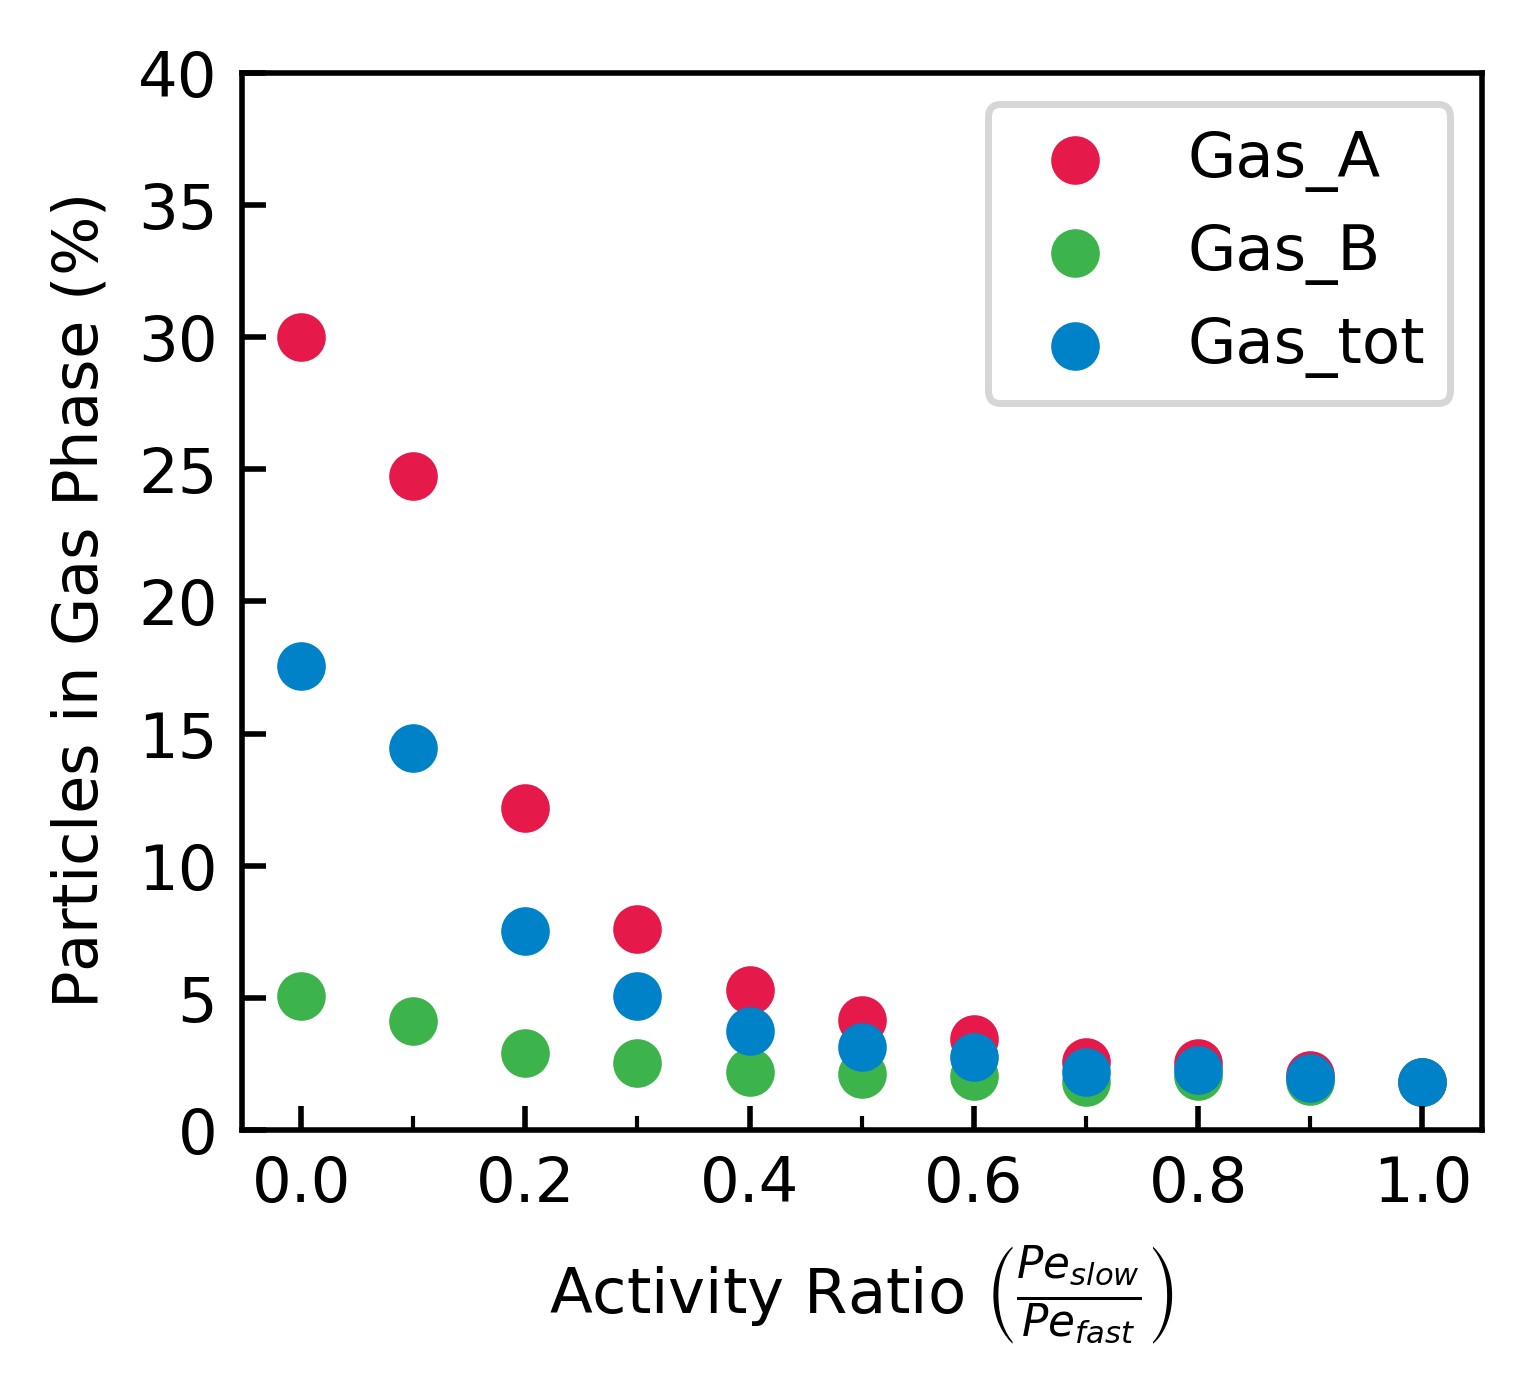

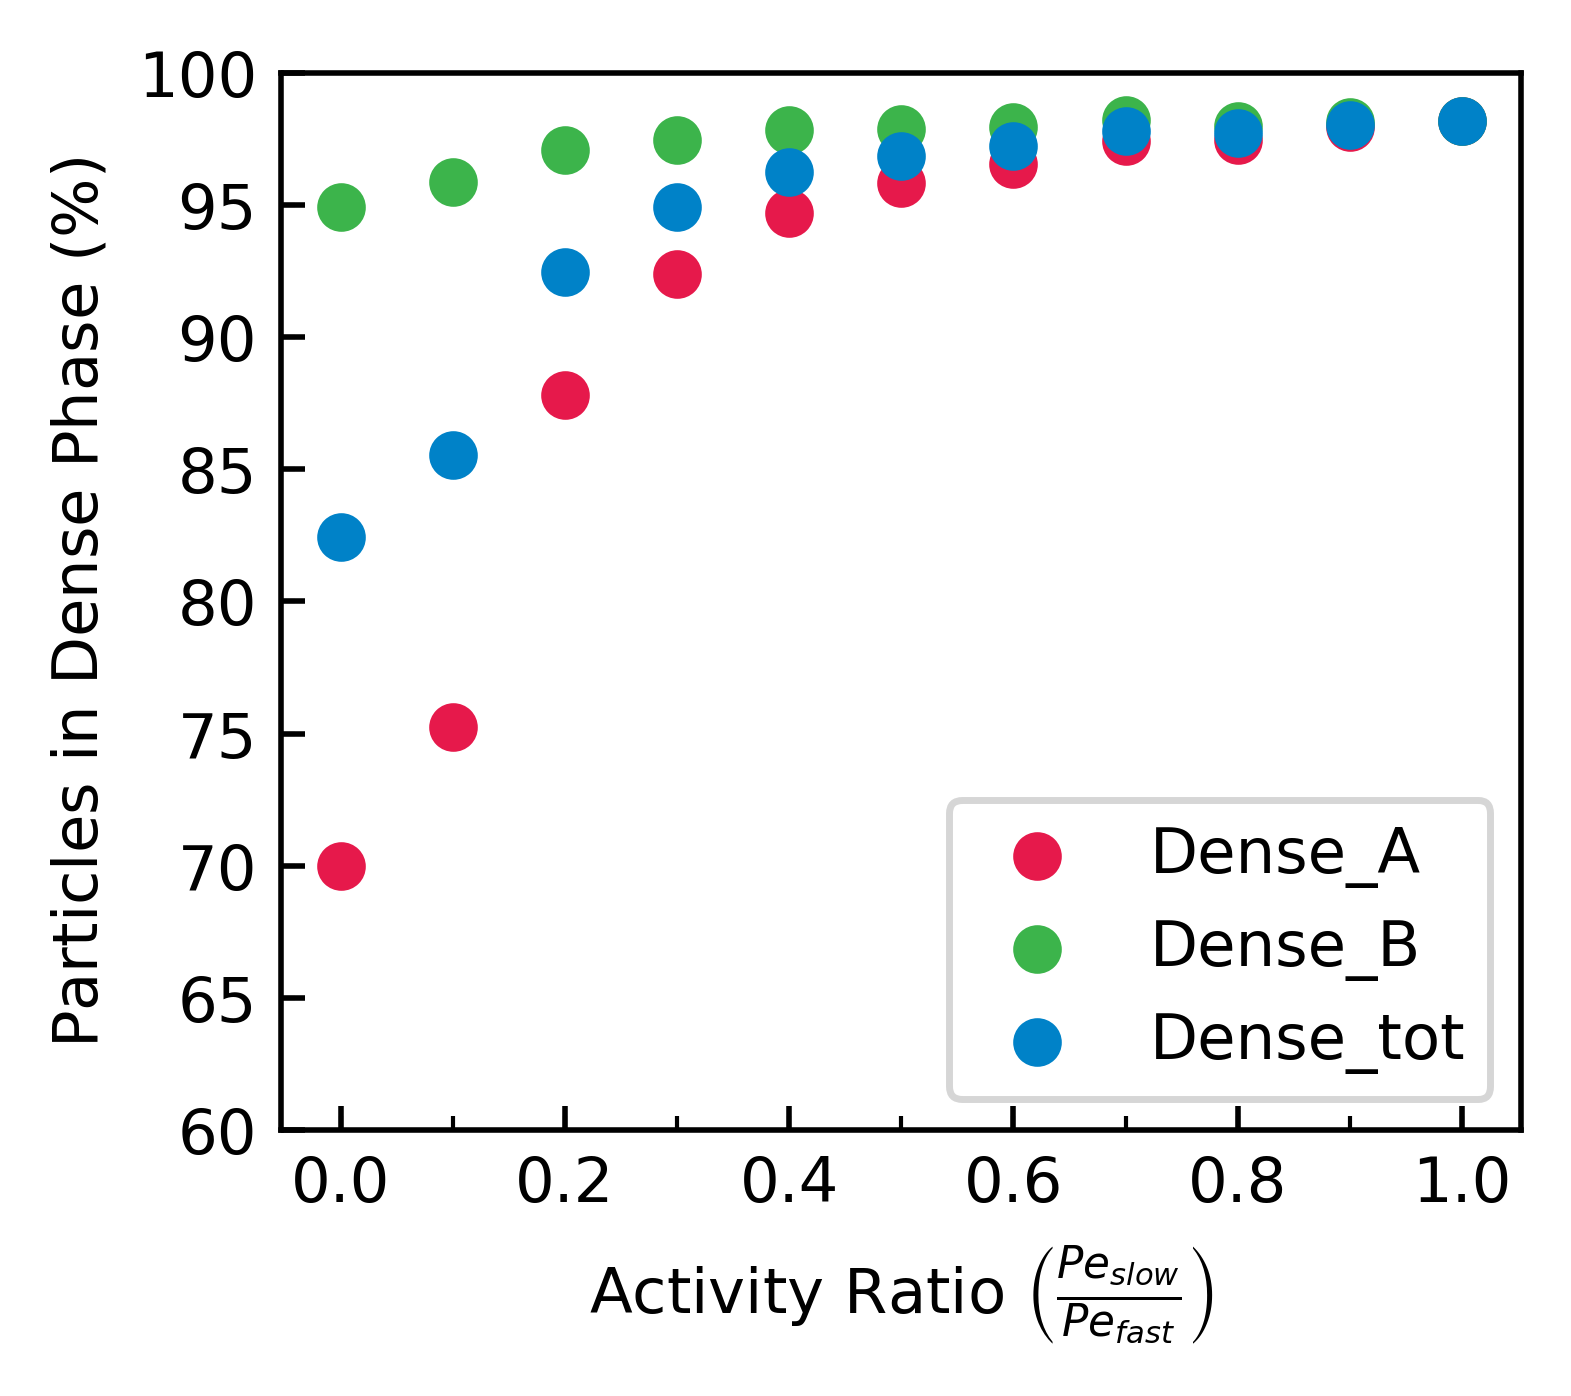

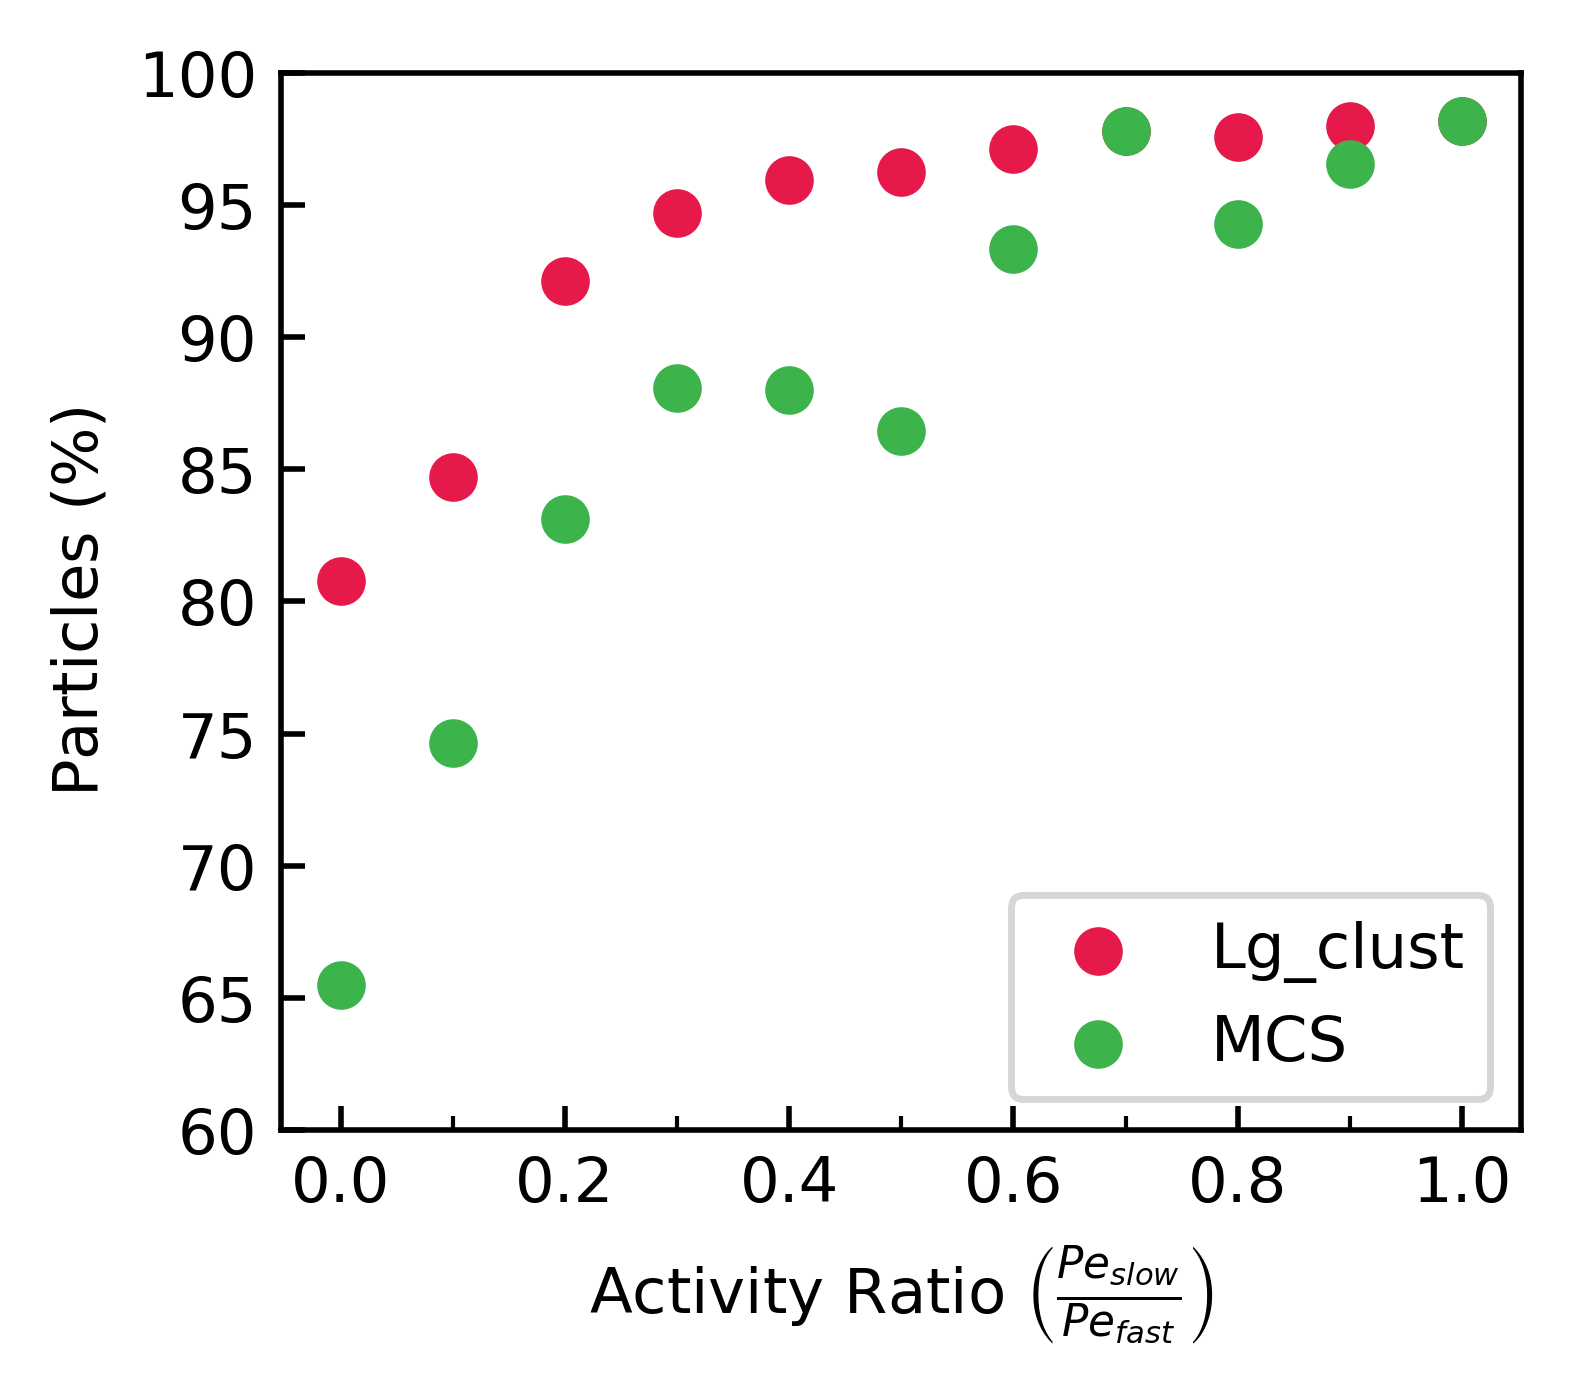

In [9]:
# Plot the data
col = ['#e6194b', '#3cb44b', '#0082c8', '#f58231', '#ffe119','#911eb4', '#46f0f0',
       '#f032e6', '#d2f53c', '#fabebe', '#008080', '#e6beff', '#aa6e28', '#fffac8',
       '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000080', '#808080', '#ffffff',
       '#000000']
plotter(0, 3, r'Particles in Gas Phase $\left(\%\right)$')
plotter(3, 6, r'Particles in Dense Phase $\left(\%\right)$')
plotter(6, 8, r'Particles $\left(\%\right)$')
# plotter(8, 12, r'Diameter $(\sigma)$')
# plotter(12, 13, r'Effective Area Fraction $(\phi_{Eff})$')
# plotter(13, 15, 'Area')
# plotter(15, 17, 'Density')
# plotter(17, 18, 'Density')

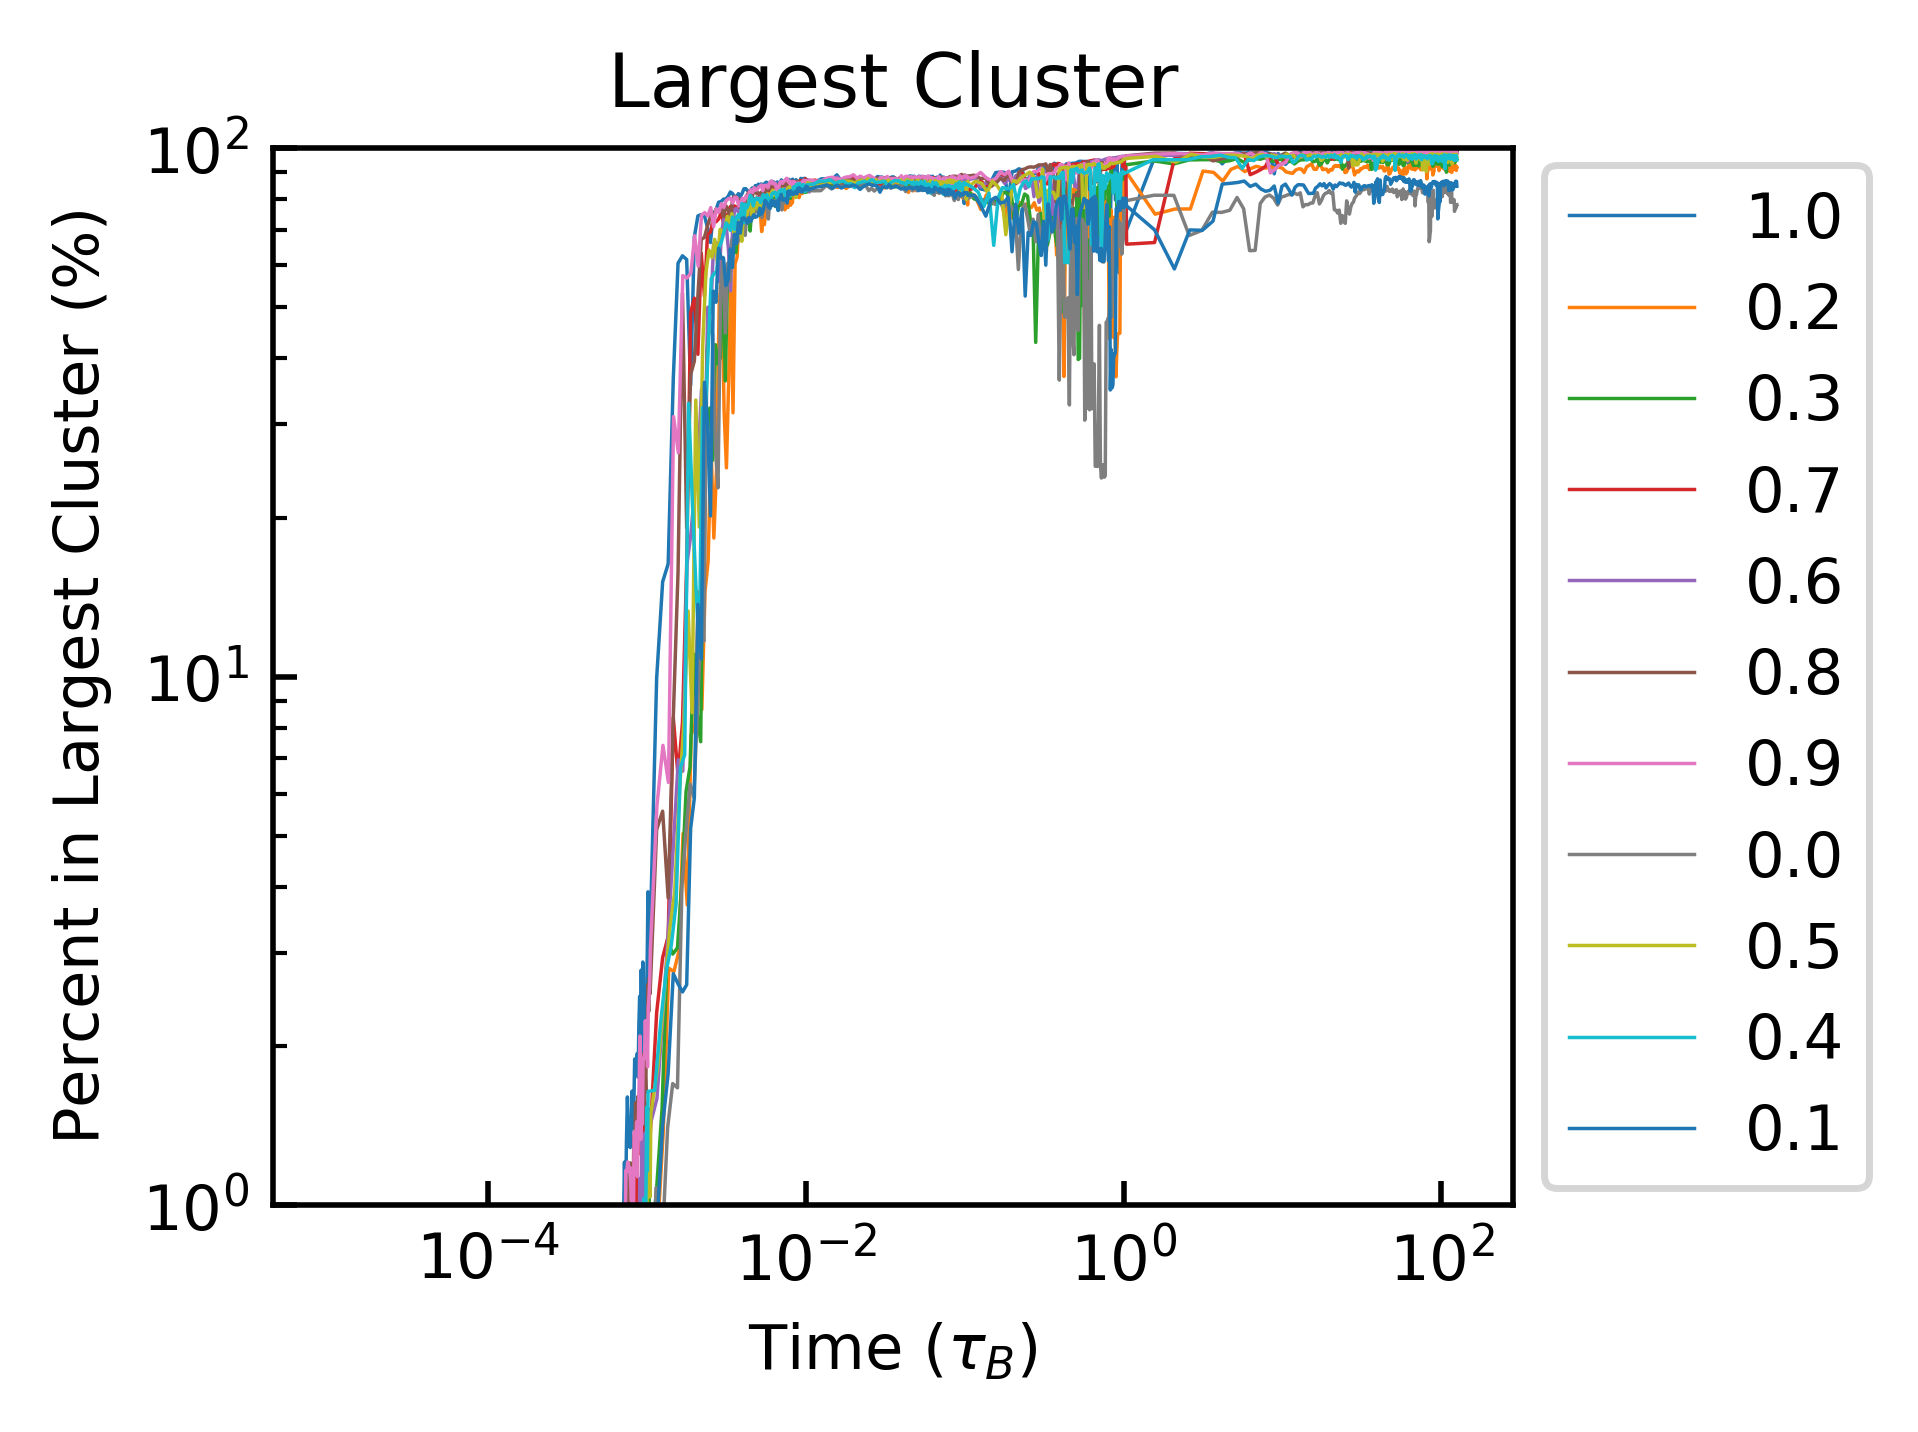

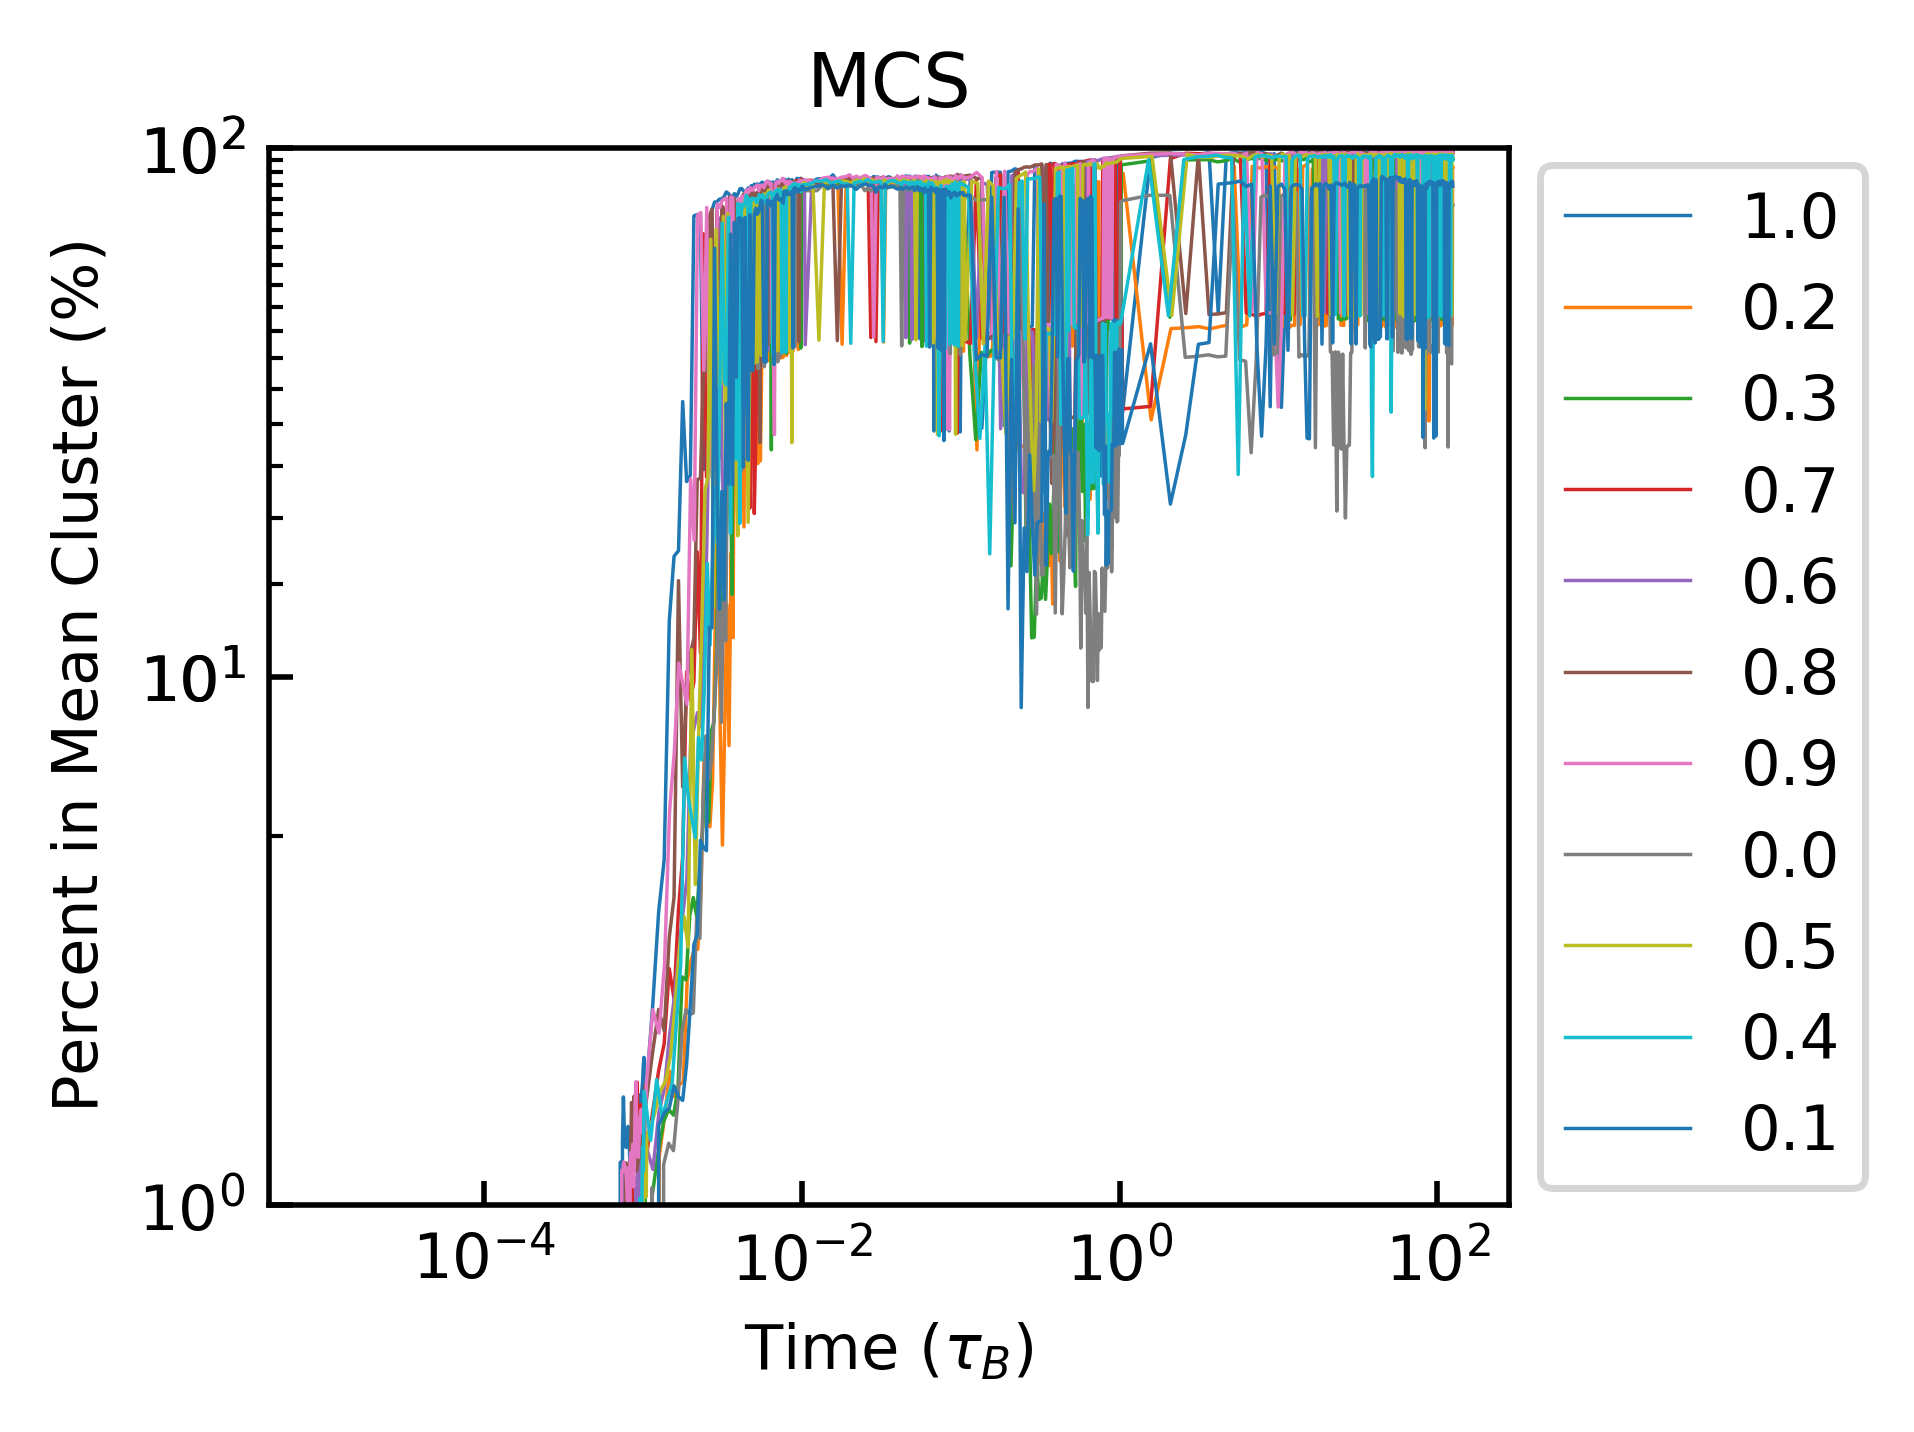

In [21]:
# Let's look at this data over time (not at steady state)
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 125.0 / all_sims[i]['Timestep'].iloc[-1]),
                 (all_sims[i]['Lg_clust'] * 100.0 / all_sims[i]['Gas_tot'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Largest Cluster')
plt.xlabel(r'Time $(\tau_{B})$')
plt.ylabel(r'Percent in Largest Cluster $(\%)$')
# ax = plt.gca()
# ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.show()

for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 125.0 / all_sims[i]['Timestep'].iloc[-1]),
                 (all_sims[i]['MCS'] * 100.0 / all_sims[i]['Gas_tot'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MCS')
plt.xlabel(r'Time $(\tau_{B})$')
plt.ylabel(r'Percent in Mean Cluster $(\%)$')
ax = plt.gca()
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.show()

# plt.semilogy((all_sims[0]['Timestep'] * 100.0 / all_sims[0]['Timestep'].iloc[-1]), (all_sims[0]['MCS']/all_sims[0]['Gas_tot'][0]))
# plt.xlim(10**-2)
# plt.ylim(1, 10**5)
# plt.show()

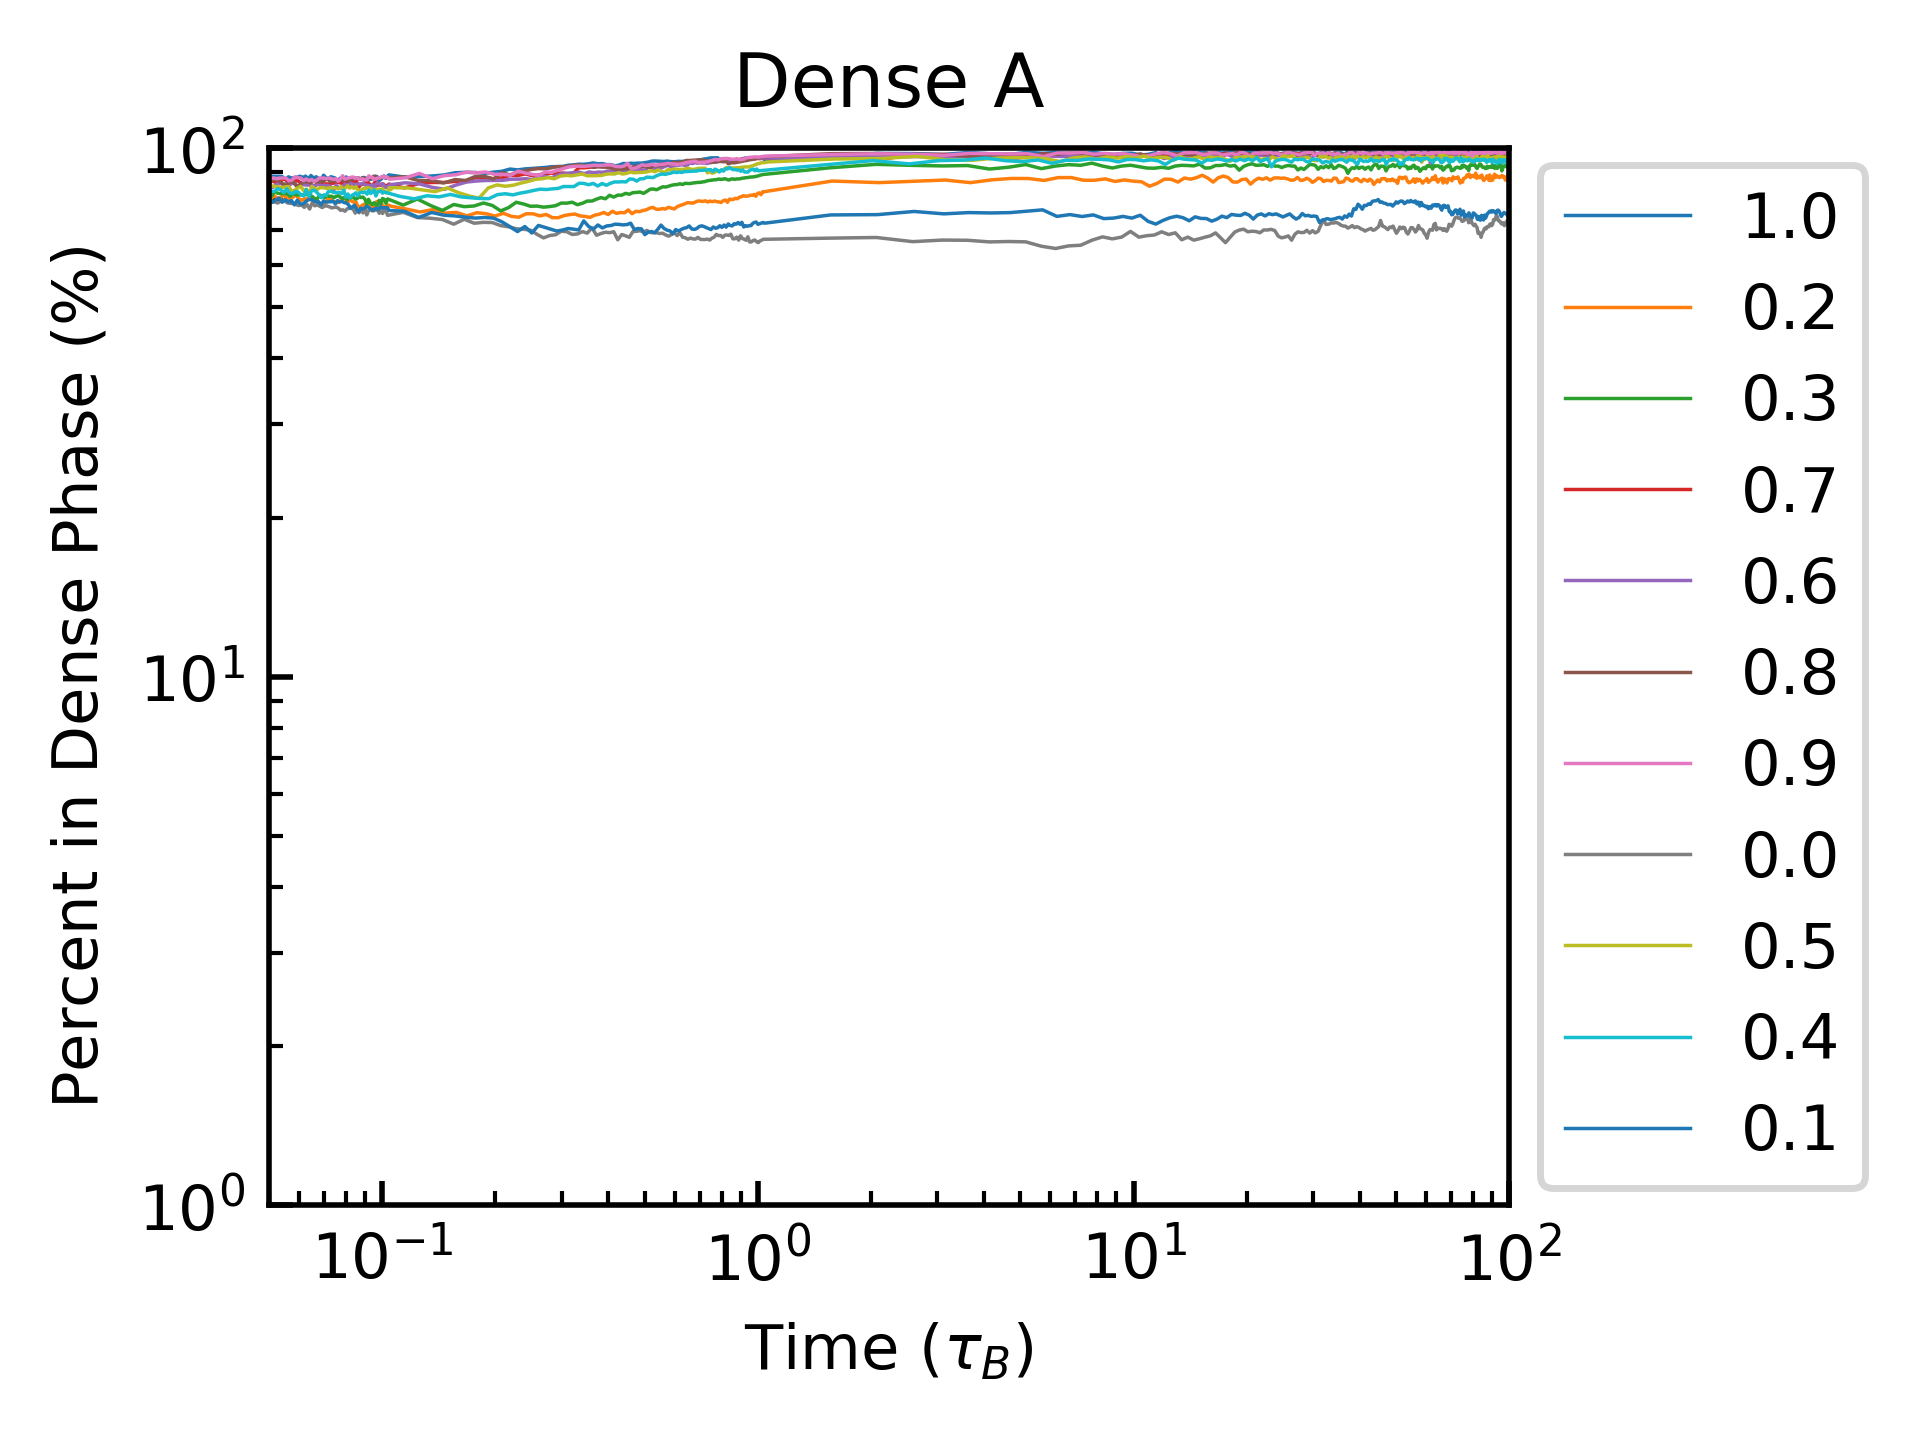

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


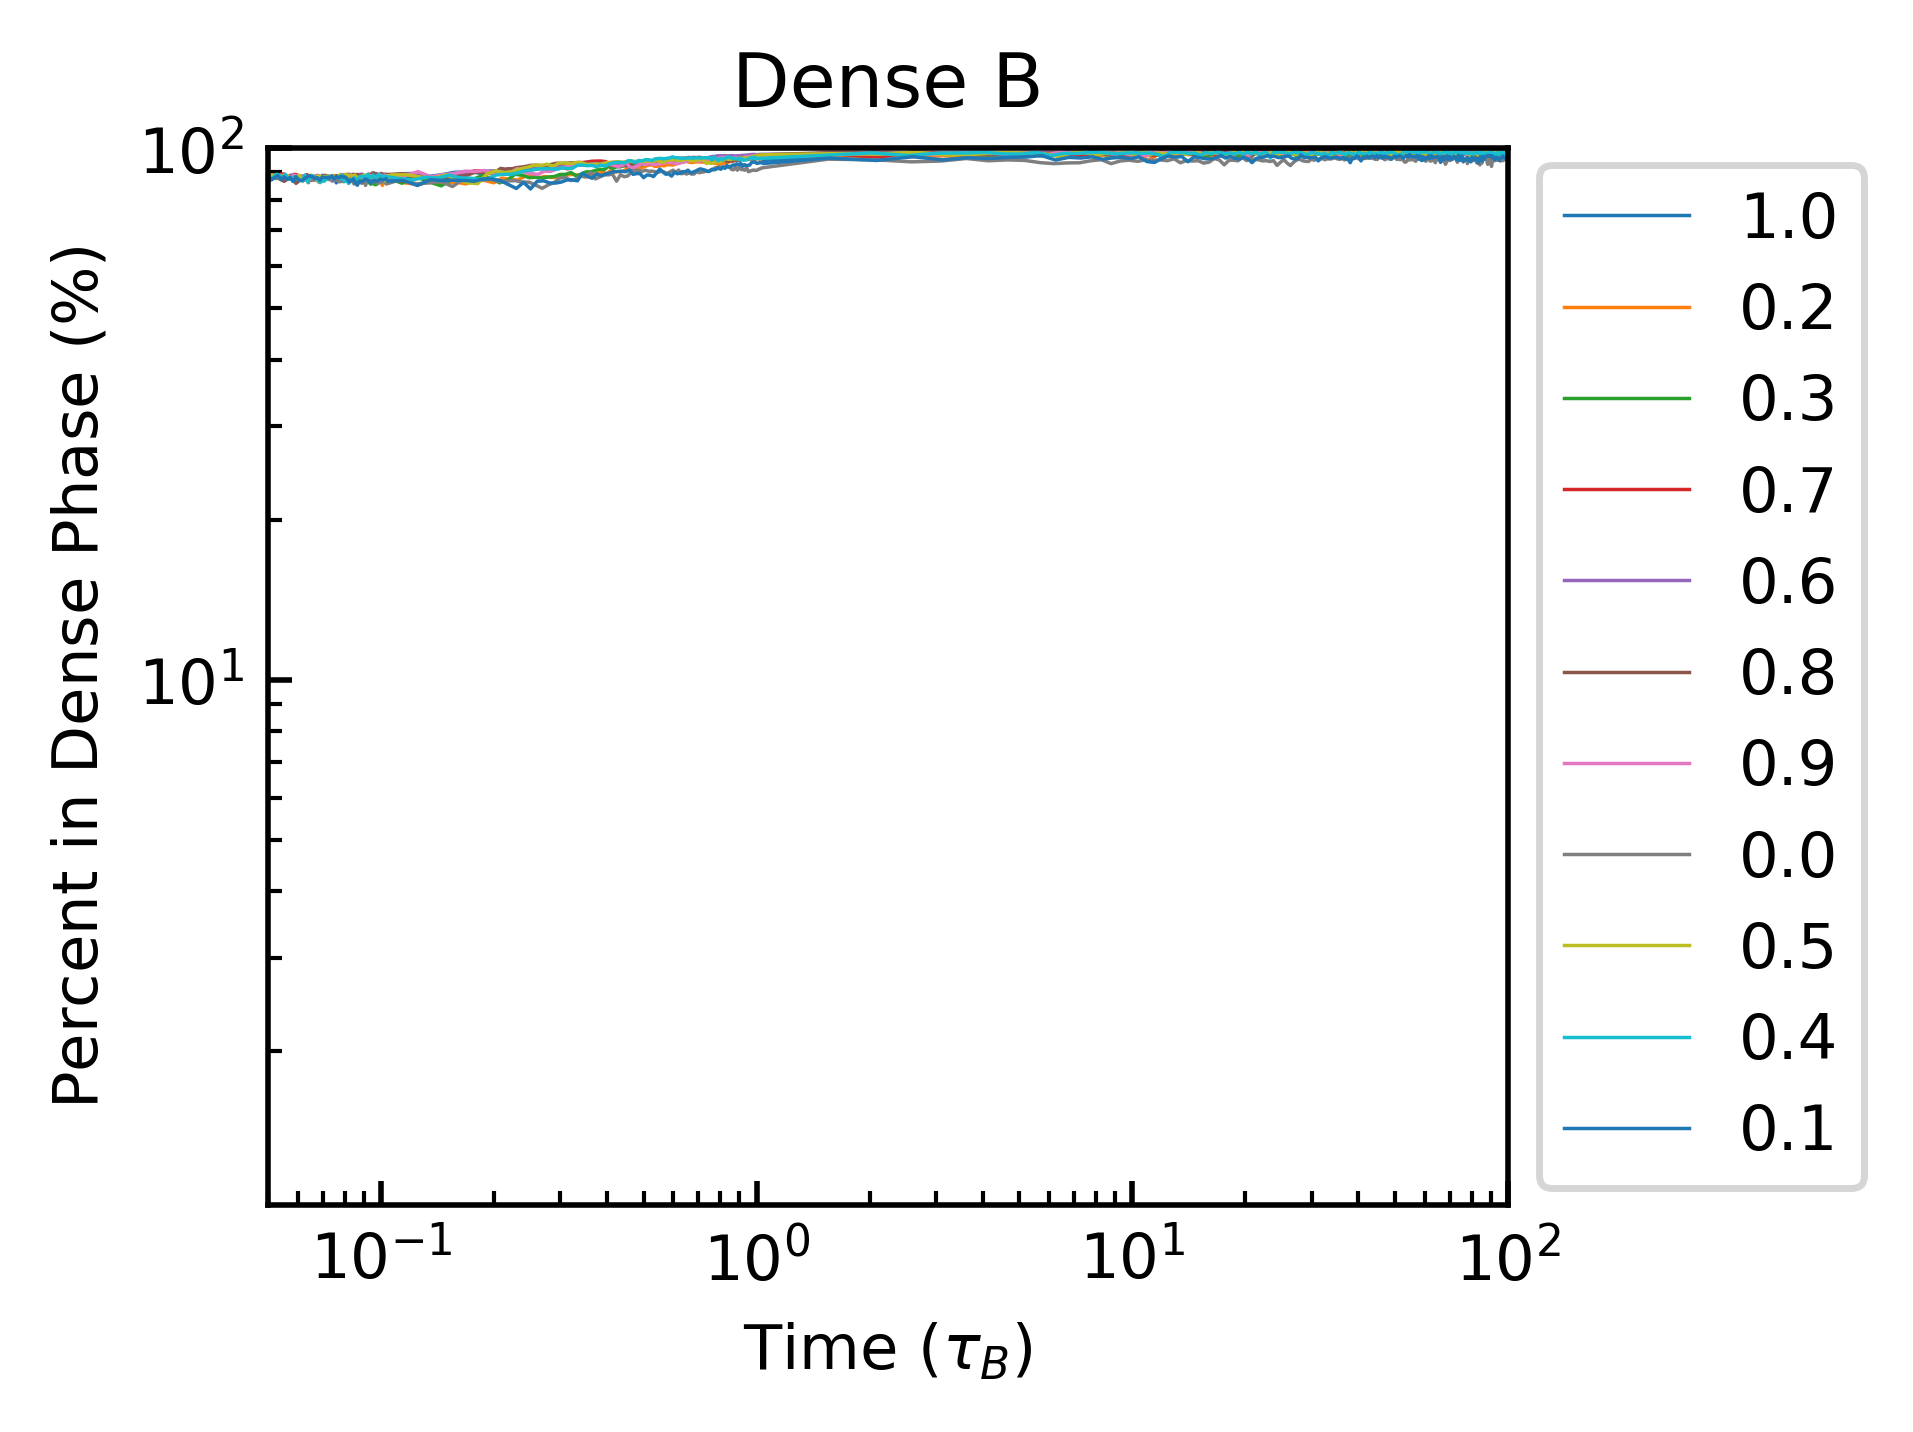

In [11]:
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 125.0 / all_sims[i]['Timestep'].iloc[-1]),
                 (all_sims[i]['Dense_A'] * 100.0 / all_sims[i]['Gas_A'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Dense A')
plt.xlabel(r'Time $(\tau_{B})$')
plt.ylabel(r'Percent in Dense Phase $(\%)$')
plt.show()

for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 125.0 / all_sims[i]['Timestep'].iloc[-1]),
                 (all_sims[i]['Dense_B'] * 100.0 / all_sims[i]['Gas_B'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.xlim(10**-1 / 2, 10**2)
plt.ylim(0, 100)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Dense B')
plt.xlabel(r'Time $(\tau_{B})$')
plt.ylabel(r'Percent in Dense Phase $(\%)$')
plt.show()

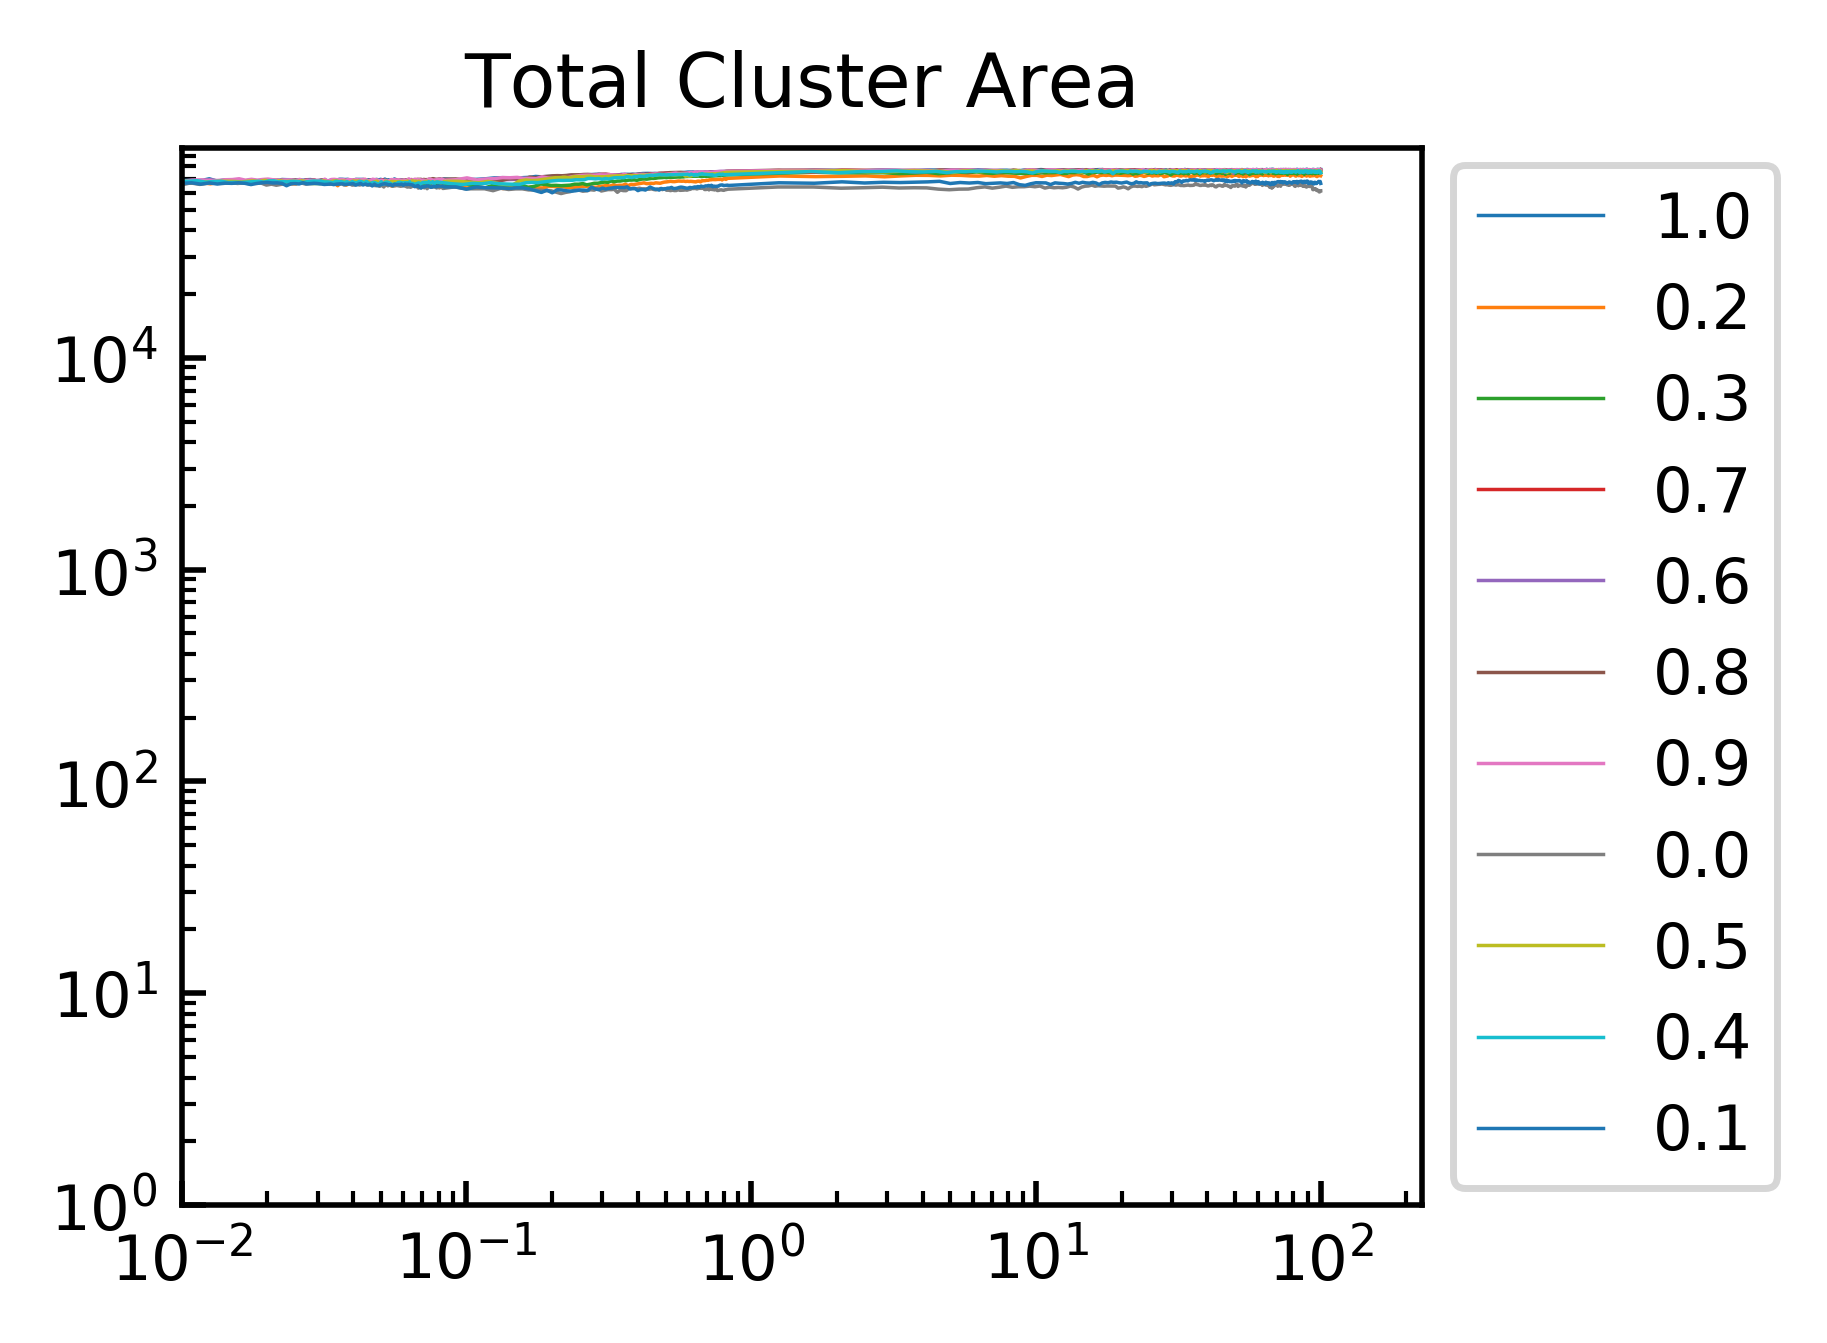

In [12]:
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 100.0 / all_sims[i]['Timestep'].iloc[-1]),
                 (all_sims[i]['tot_clustA']),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.xlim(10**-2)
plt.ylim(1)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Cluster Area')
plt.show()

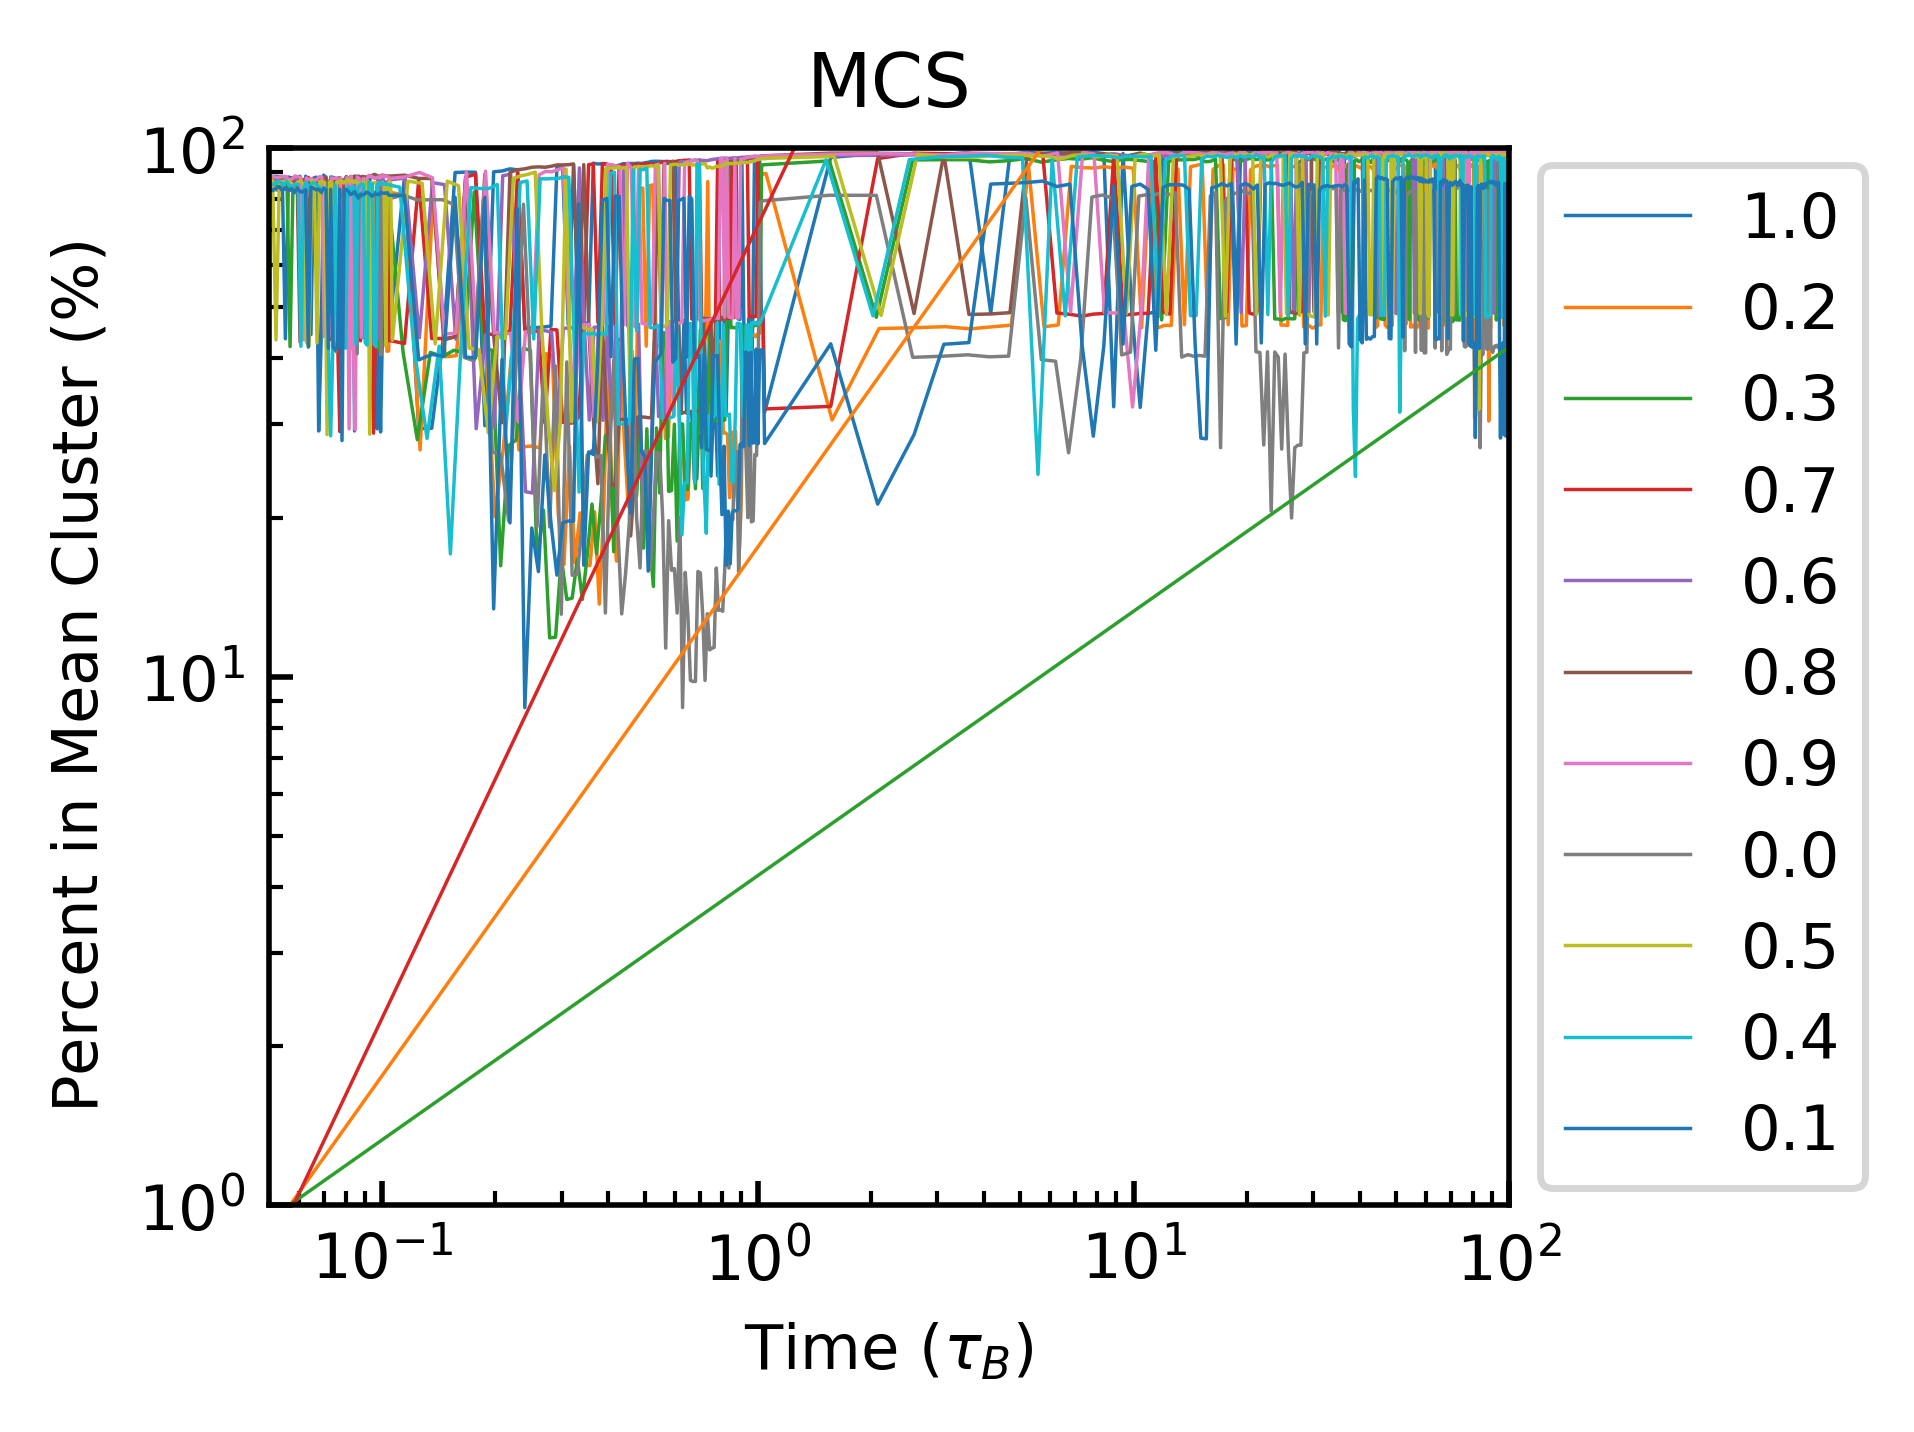

In [13]:
# Plot MCS data on loglog scale with linear data
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 125.0 / all_sims[i]['Timestep'].iloc[-1]),
                 (all_sims[i]['MCS'] * 100.0 / all_sims[i]['Gas_tot'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MCS')
plt.xlabel(r'Time $(\tau_{B})$')
plt.ylabel(r'Percent in Mean Cluster $(\%)$')
ax = plt.gca()
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

plt.loglog((all_sims[0]['Timestep'] * 125.0 / all_sims[0]['Timestep'].iloc[-1]),
          loglogStraight((all_sims[0]['Timestep'] * 100.0 / all_sims[0]['Timestep'].iloc[-1]), 22.0, 1.0),
          label='b=1')
plt.loglog((all_sims[0]['Timestep'] * 125.0 / all_sims[0]['Timestep'].iloc[-1]),
          loglogStraight((all_sims[0]['Timestep'] * 100.0 / all_sims[0]['Timestep'].iloc[-1]), 4.7, 0.5),
          label='b=0.5')
plt.loglog((all_sims[0]['Timestep'] * 125.0 / all_sims[0]['Timestep'].iloc[-1]),
          loglogStraight((all_sims[0]['Timestep'] * 100.0 / all_sims[0]['Timestep'].iloc[-1]), 100.0, 1.5),
          label='b=1.5')

plt.show()

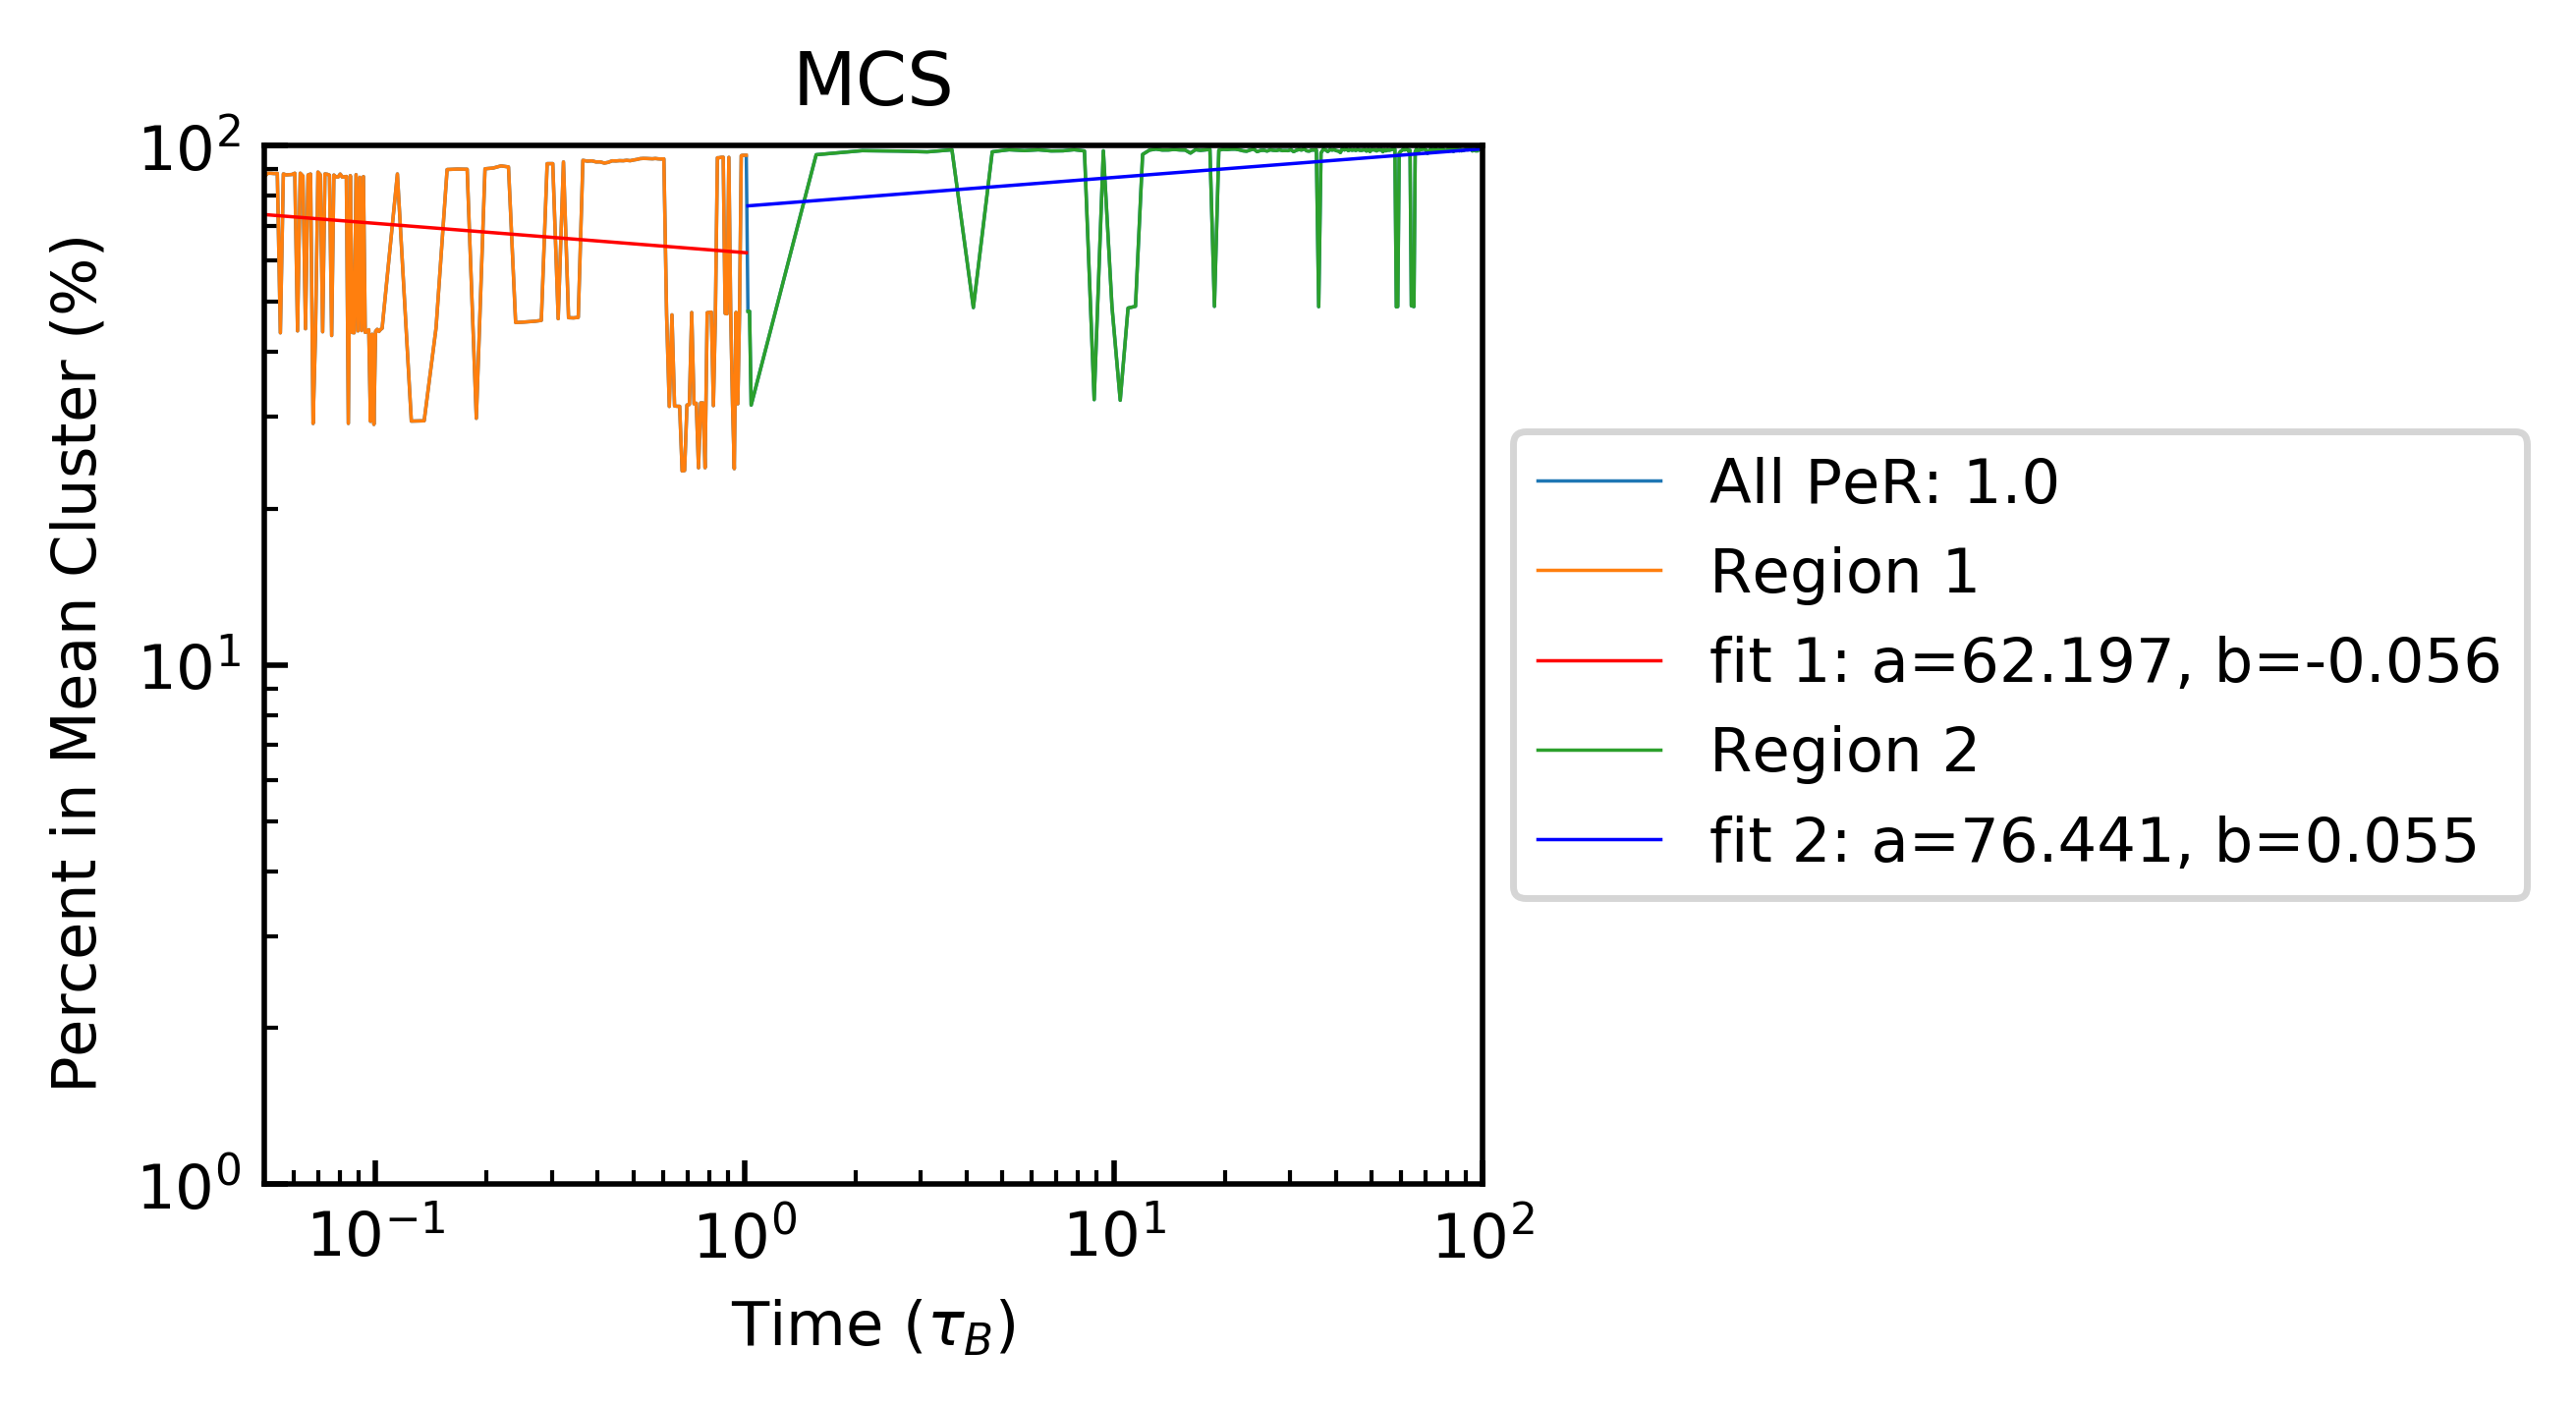

In [14]:
# Plot MCS data on loglog scale with linear data
plt.loglog((all_sims[0]['Timestep'] * 125.0 / all_sims[0]['Timestep'].iloc[-1]),
           (all_sims[0]['MCS'] * 100.0 / all_sims[0]['Gas_tot'][0]),
           label="All PeR: " + str(params['peR'][0]))

# Regime 1
xdata = (all_sims[0]['Timestep'][300:450] * 125.0 / all_sims[0]['Timestep'].iloc[-1])
ydata = (all_sims[0]['MCS'][300:450] * 100.0 / all_sims[0]['Gas_tot'][0])
plt.loglog(xdata, ydata, label='Region 1')
popt, pcov = curve_fit(loglogStraight, xdata, ydata)
popt
plt.loglog(xdata, loglogStraight(xdata, *popt), 'r-',
         label='fit 1: a=%5.3f, b=%5.3f' % tuple(popt))

# Regime 2
xdata2 = (all_sims[0]['Timestep'][450:] * 125.0 / all_sims[0]['Timestep'].iloc[-1])
ydata2 = (all_sims[0]['MCS'][450:] * 100.0 / all_sims[0]['Gas_tot'][0])
plt.loglog(xdata2, ydata2, label="Region 2")
popt2, pcov2 = curve_fit(loglogStraight, xdata2, ydata2, bounds=(0, [1000, 2.0]))
popt2
plt.loglog(xdata2, loglogStraight(xdata2, *popt2), 'b-',
         label='fit 2: a=%5.3f, b=%5.3f' % tuple(popt2))

# Where do you separate these regimes?
# Where does regime 1 start?

# Plot fit function for all data
# xAll = (all_sims[0]['Timestep'][300:] * 125.0 / all_sims[0]['Timestep'].iloc[-1])
# yAll = (all_sims[0]['MCS'][300:] * 100.0 / all_sims[0]['Gas_tot'][0])
# poptAll, pcovAll = curve_fit(loglogCurve, xAll, yAll)
# poptAll
# plt.loglog(xAll, loglogCurve(xAll, *poptAll), 'k-',
#          label='fit All: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(poptAll))


plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MCS')
plt.xlabel(r'Time $(\tau_{B})$')
plt.ylabel(r'Percent in Mean Cluster $(\%)$')
plt.show()

In [15]:
def plotFit(xdata, ydata):
    popt, pcov = curve_fit(loglogStraight, xdata, ydata)
    plt.loglog(xdata, loglogStraight(xdata, *popt),
               label='fit PeR=' + str(params['peR'][i]) + ': b=%5.3f' % (popt[1]))

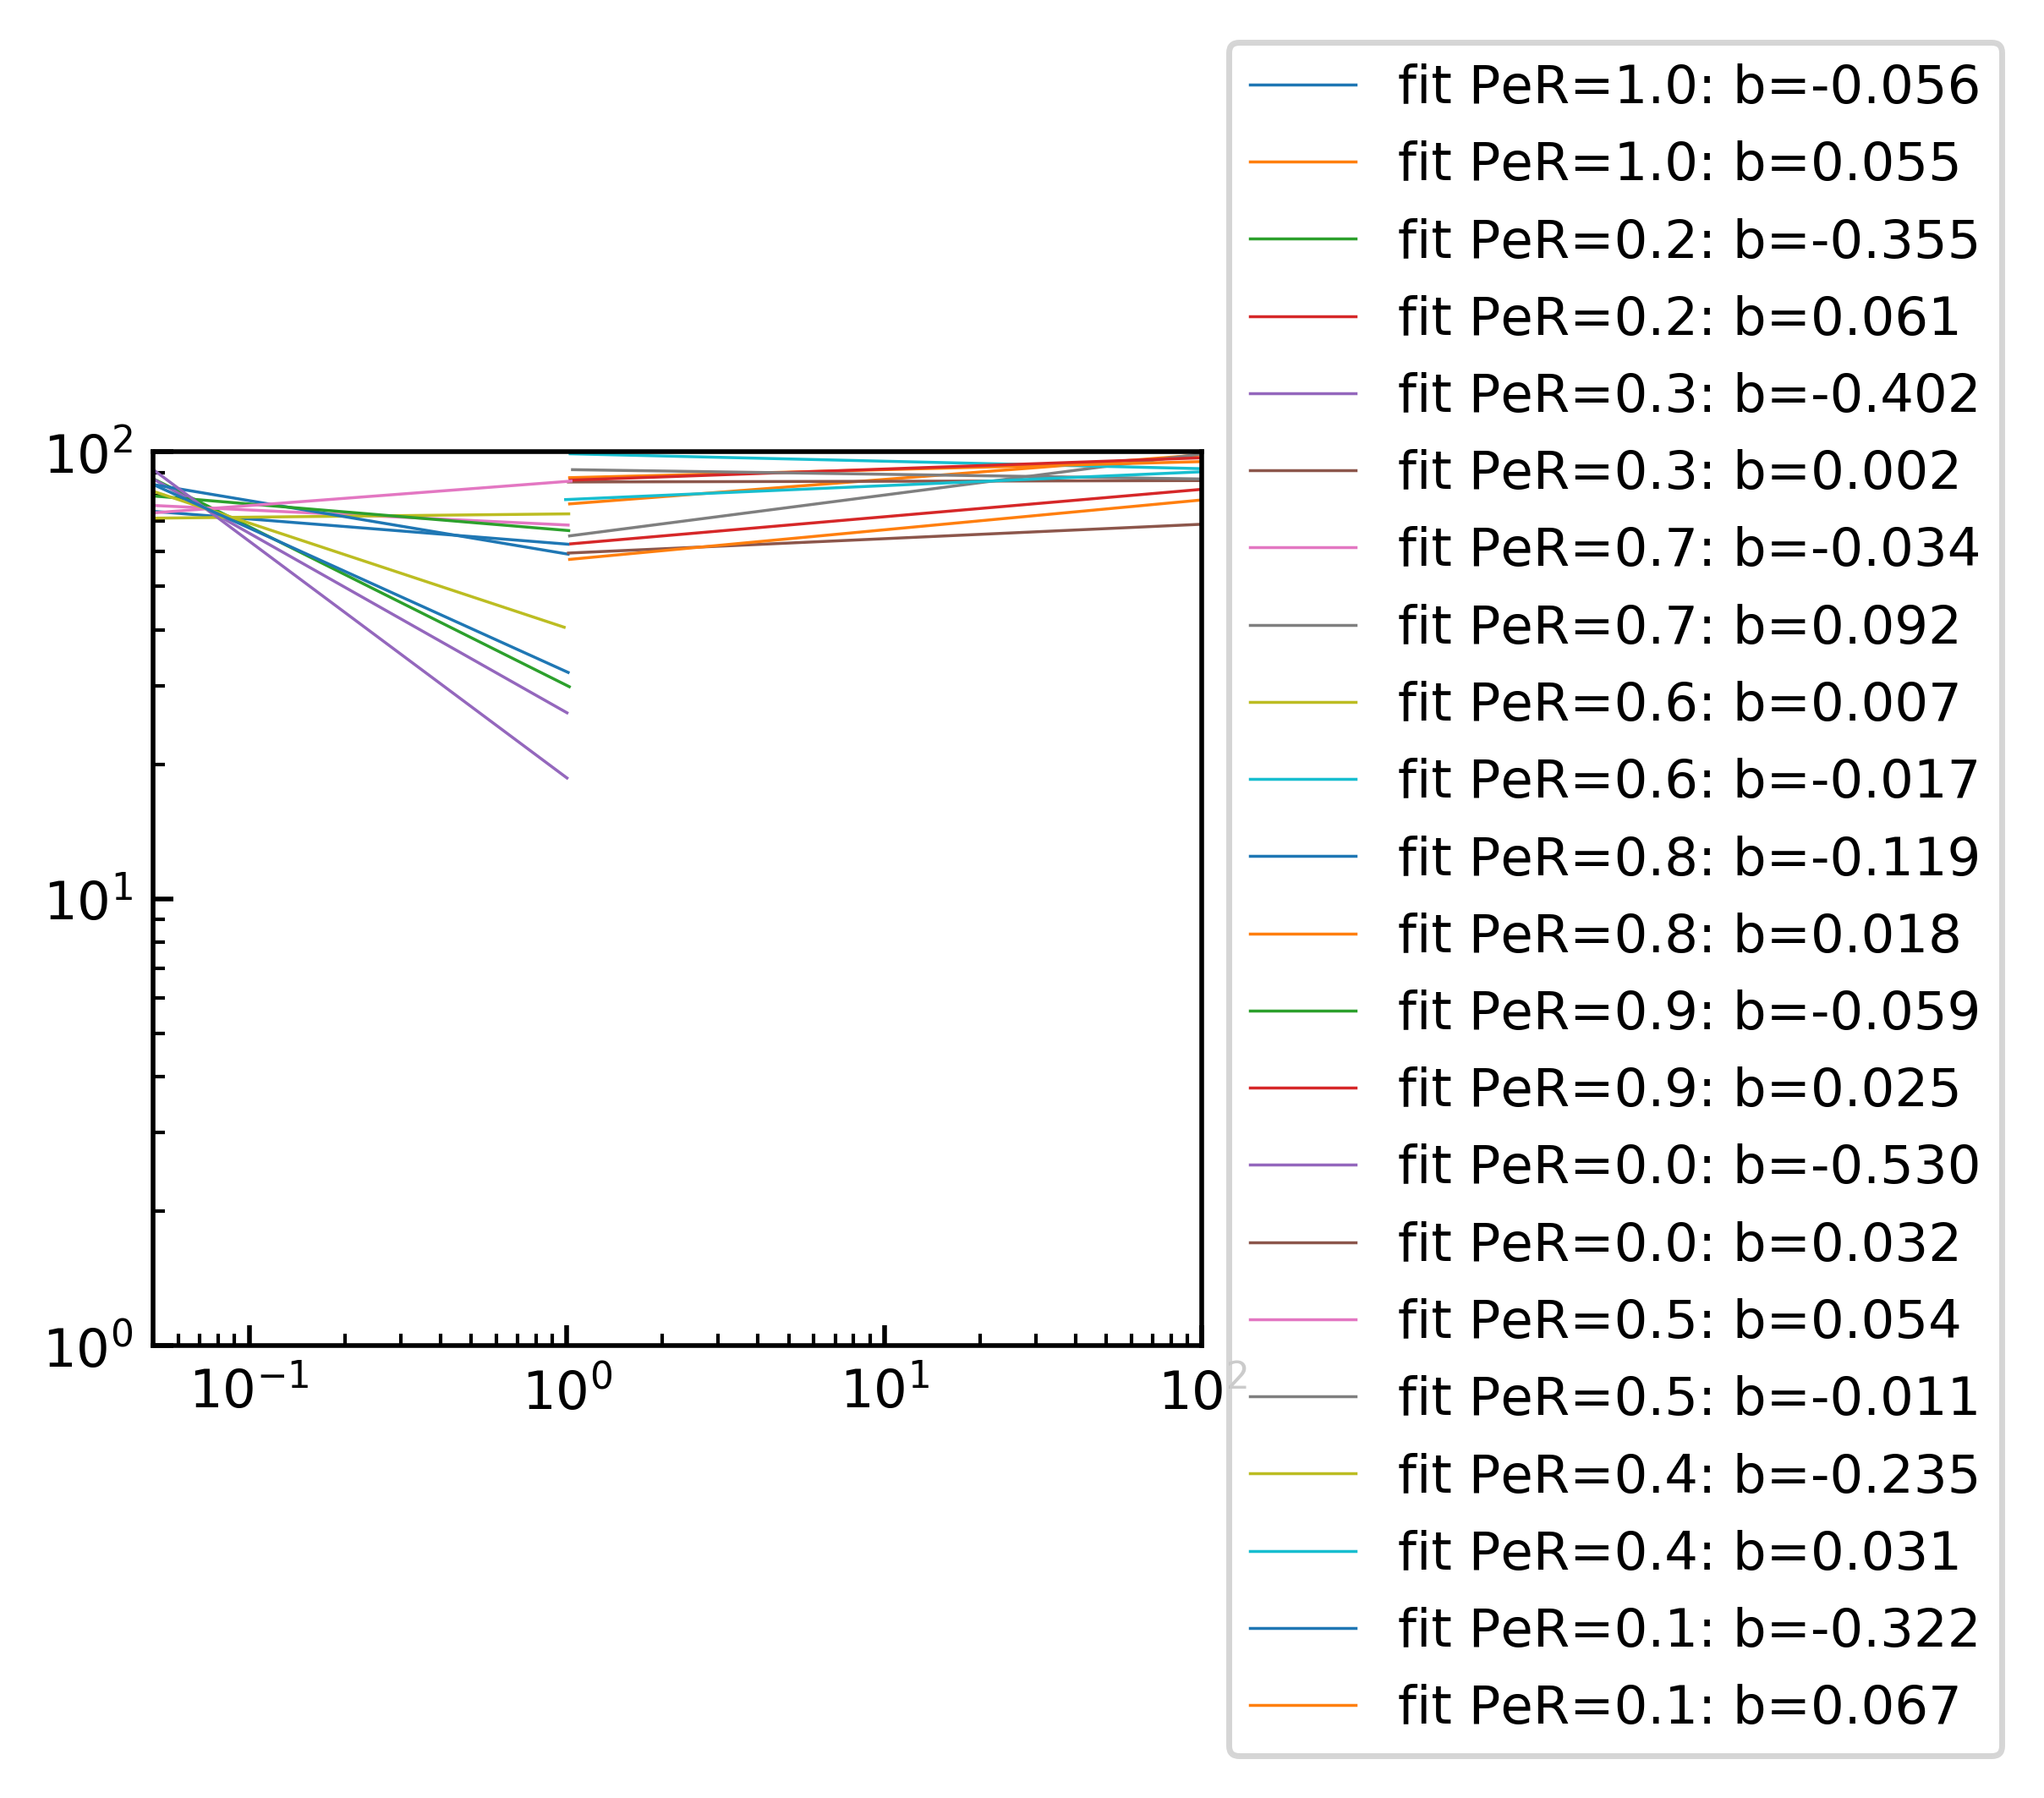

In [16]:
reg1Start = 300
reg1Stop = 450
reg2Start = 450
reg2Stop = -1
for i in xrange(len(txtFiles)):
    # Regime 1
    x1 = (all_sims[i]['Timestep'][reg1Start:reg1Stop] * 125.0 / all_sims[i]['Timestep'].iloc[-1])
    y1 = (all_sims[i]['MCS'][reg1Start:reg1Stop] * 100.0 / all_sims[i]['Gas_tot'][0])
    plotFit(x1, y1)
    # Regime 2
    x2 = (all_sims[i]['Timestep'][reg2Start:reg2Stop] * 125.0 / all_sims[i]['Timestep'].iloc[-1])
    y2 = (all_sims[i]['MCS'][reg2Start:reg2Stop] * 100.0 / all_sims[i]['Gas_tot'][0])
    plotFit(x2, y2)
plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [17]:
# You should get the first index of each whereMCS > 1
# Then plot Crossing time vs Pe
# Fit this!
# Now you have a normalizing timescale :)

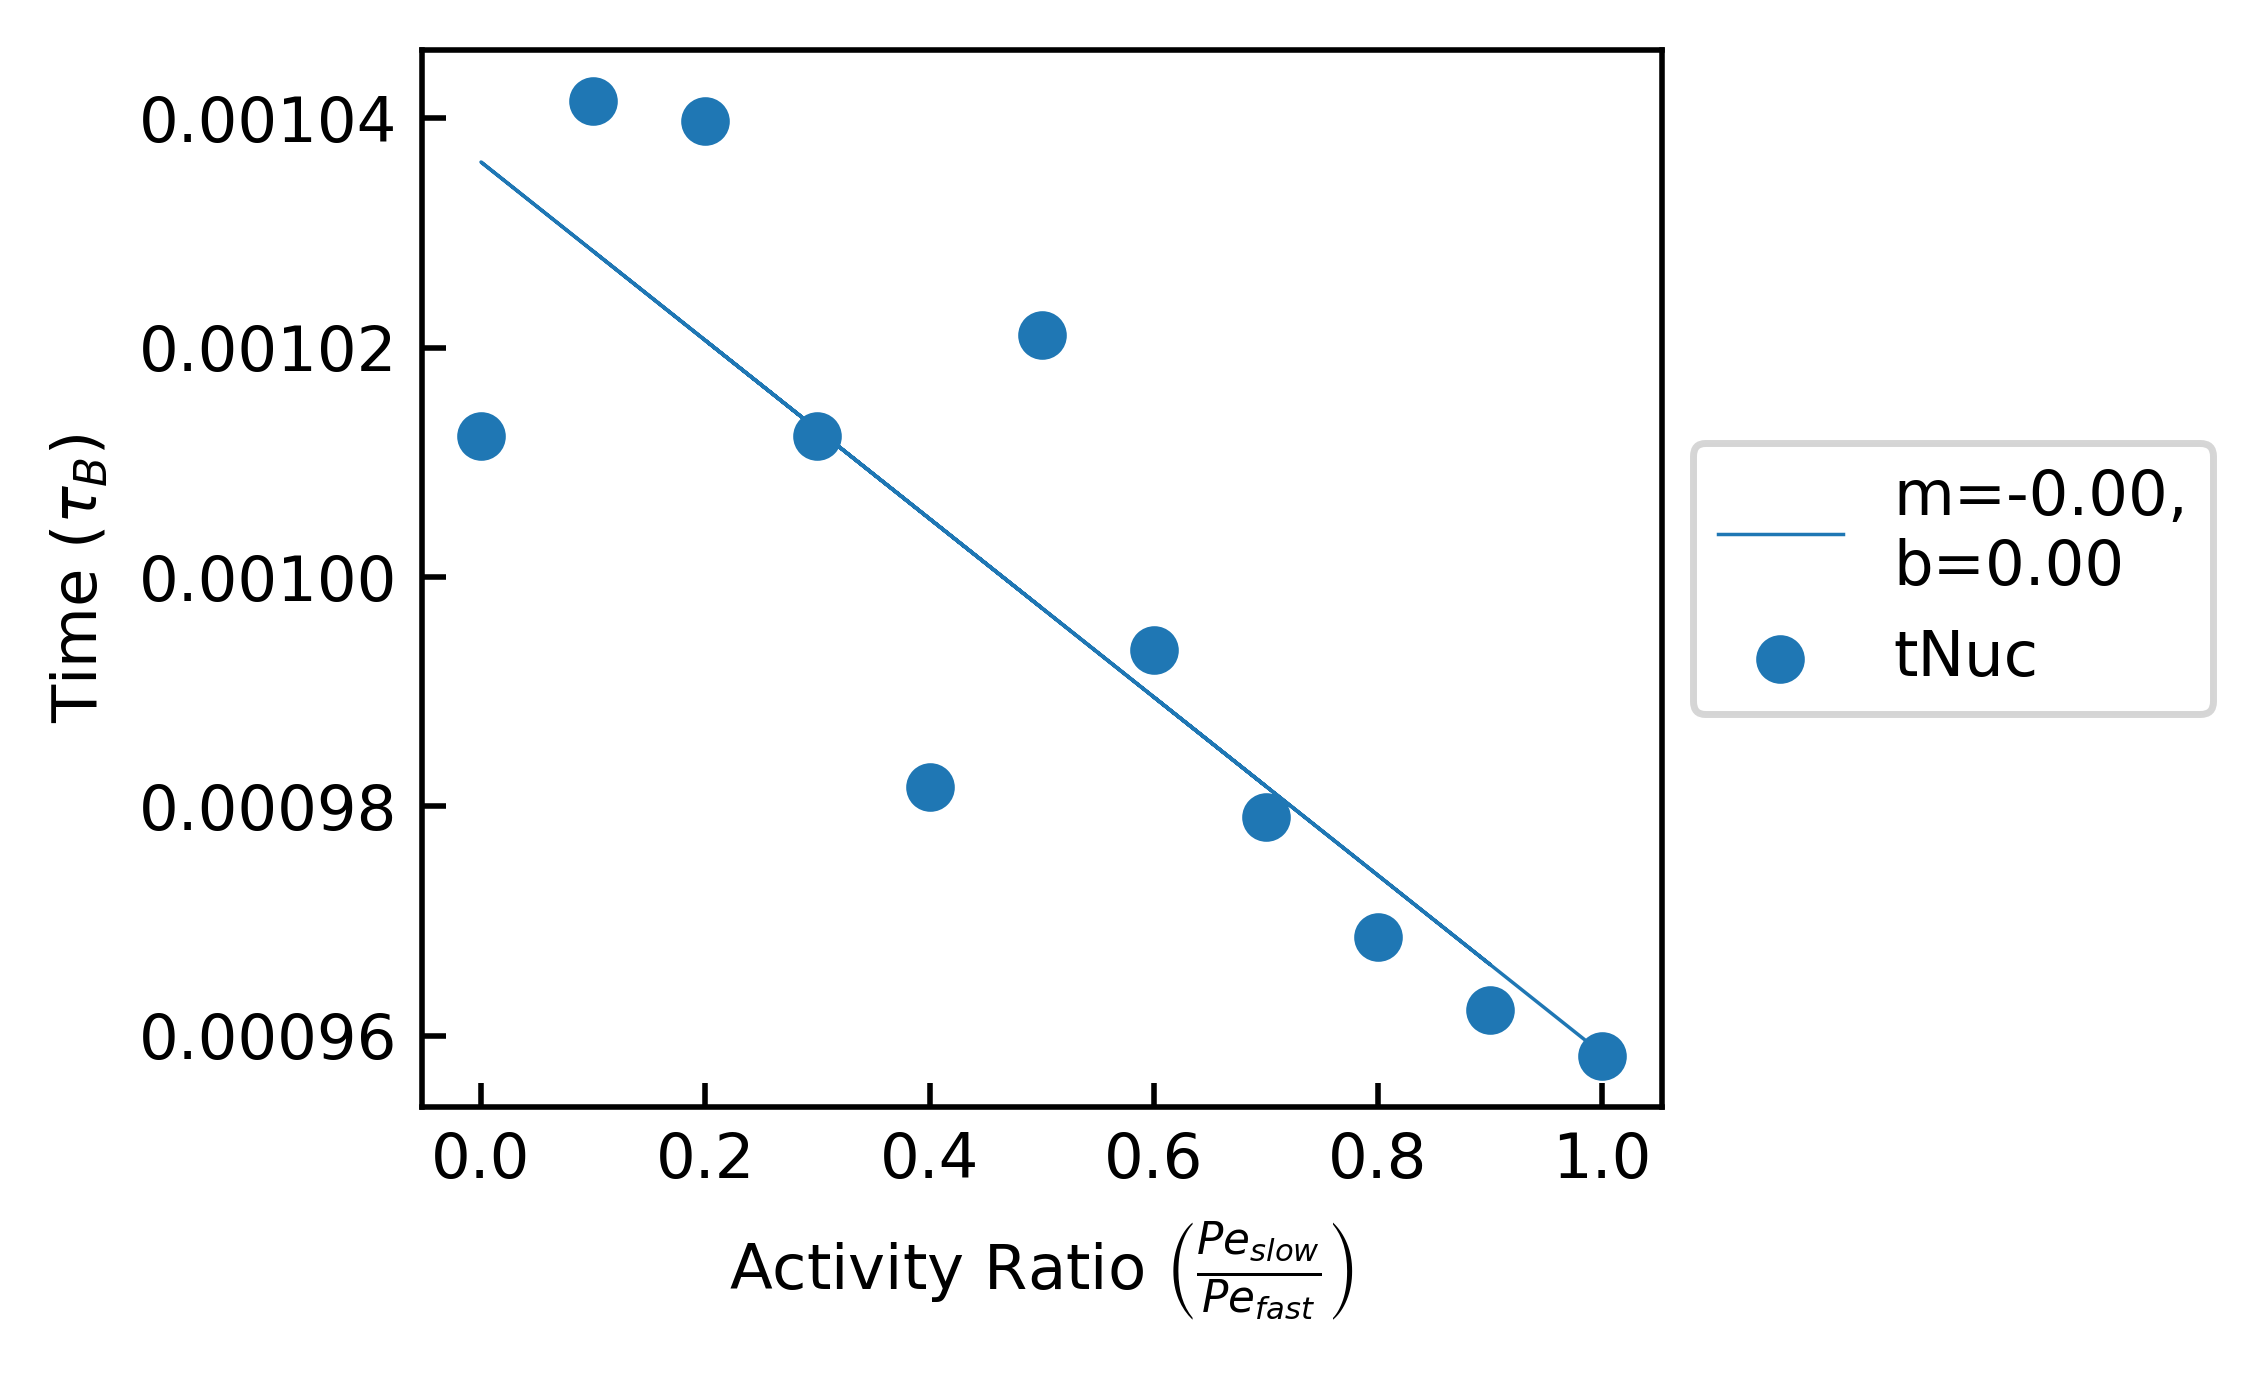

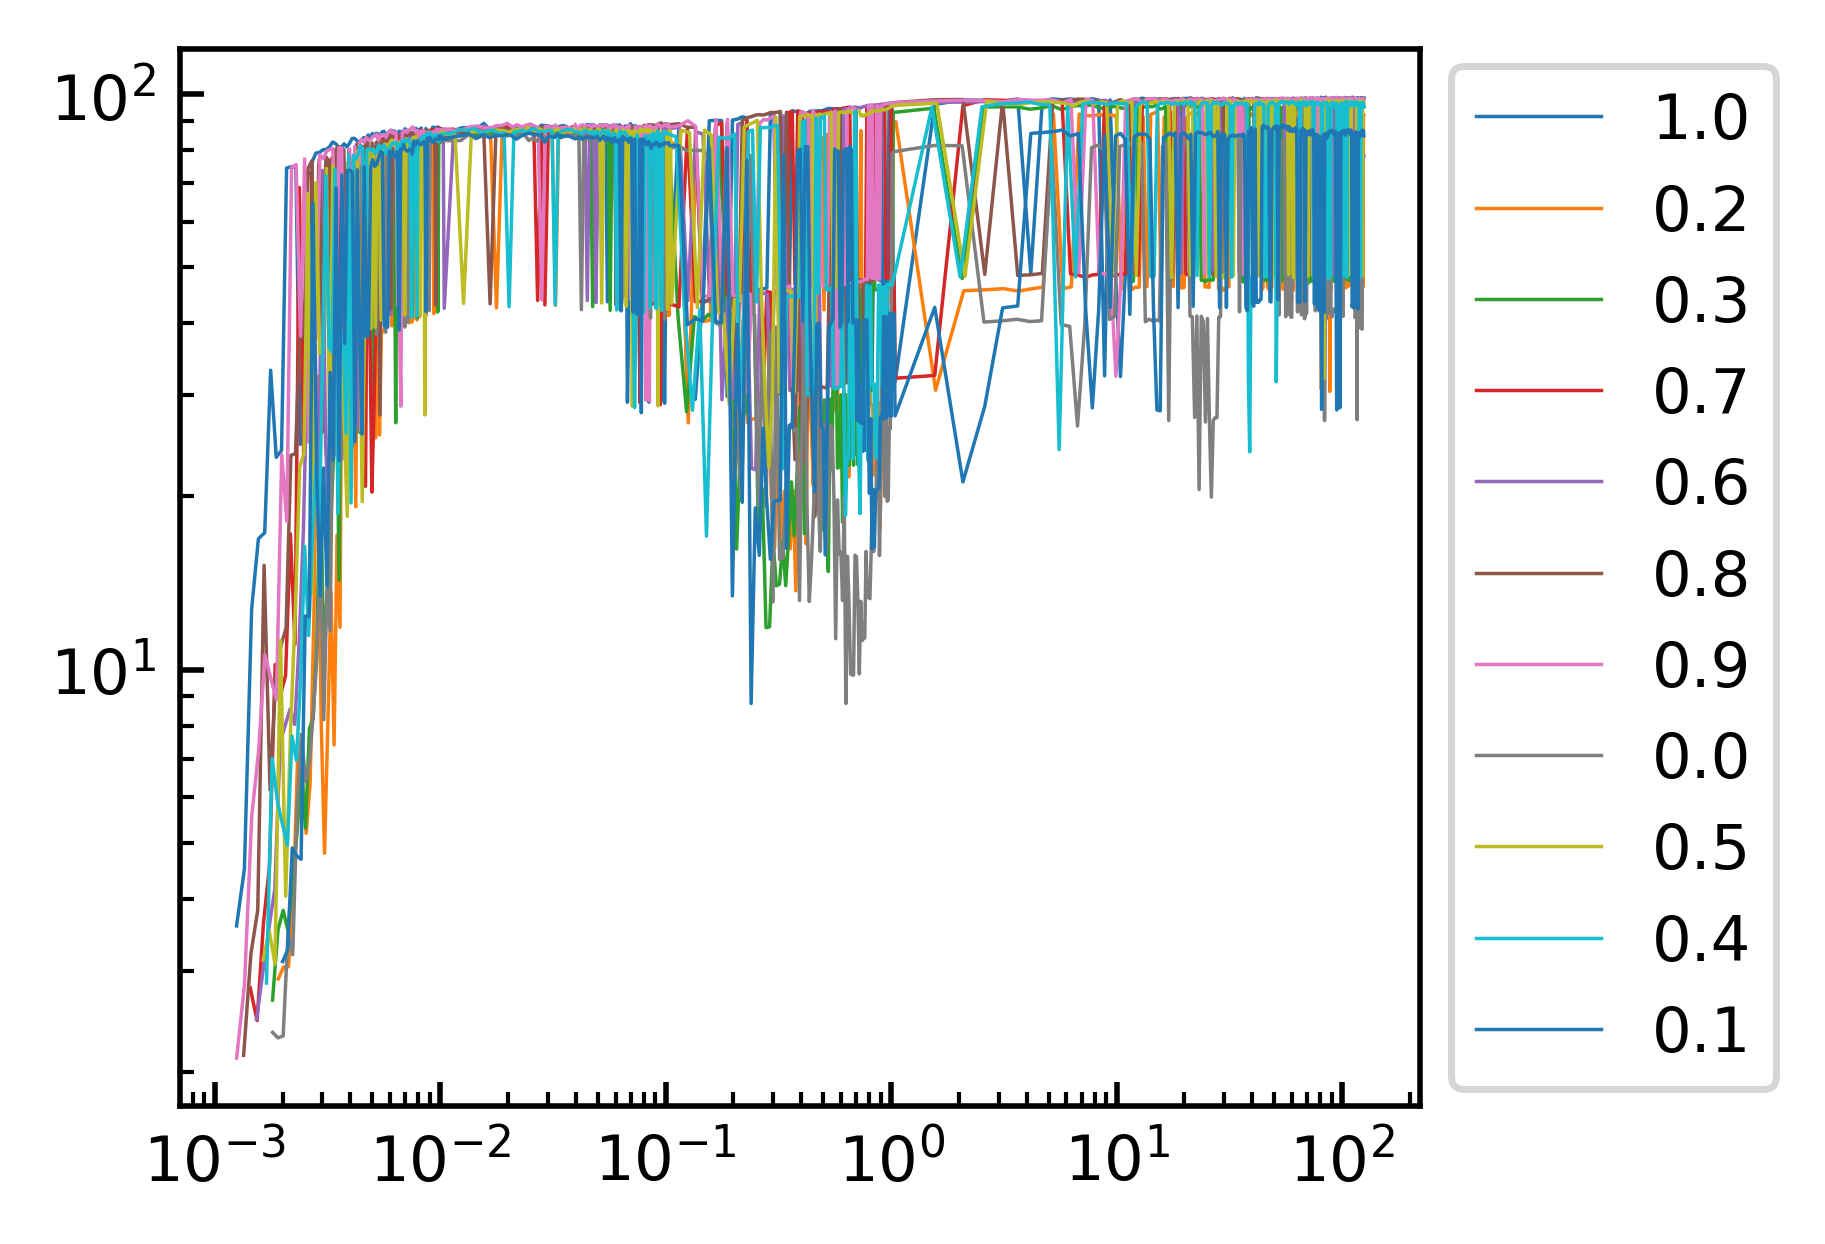

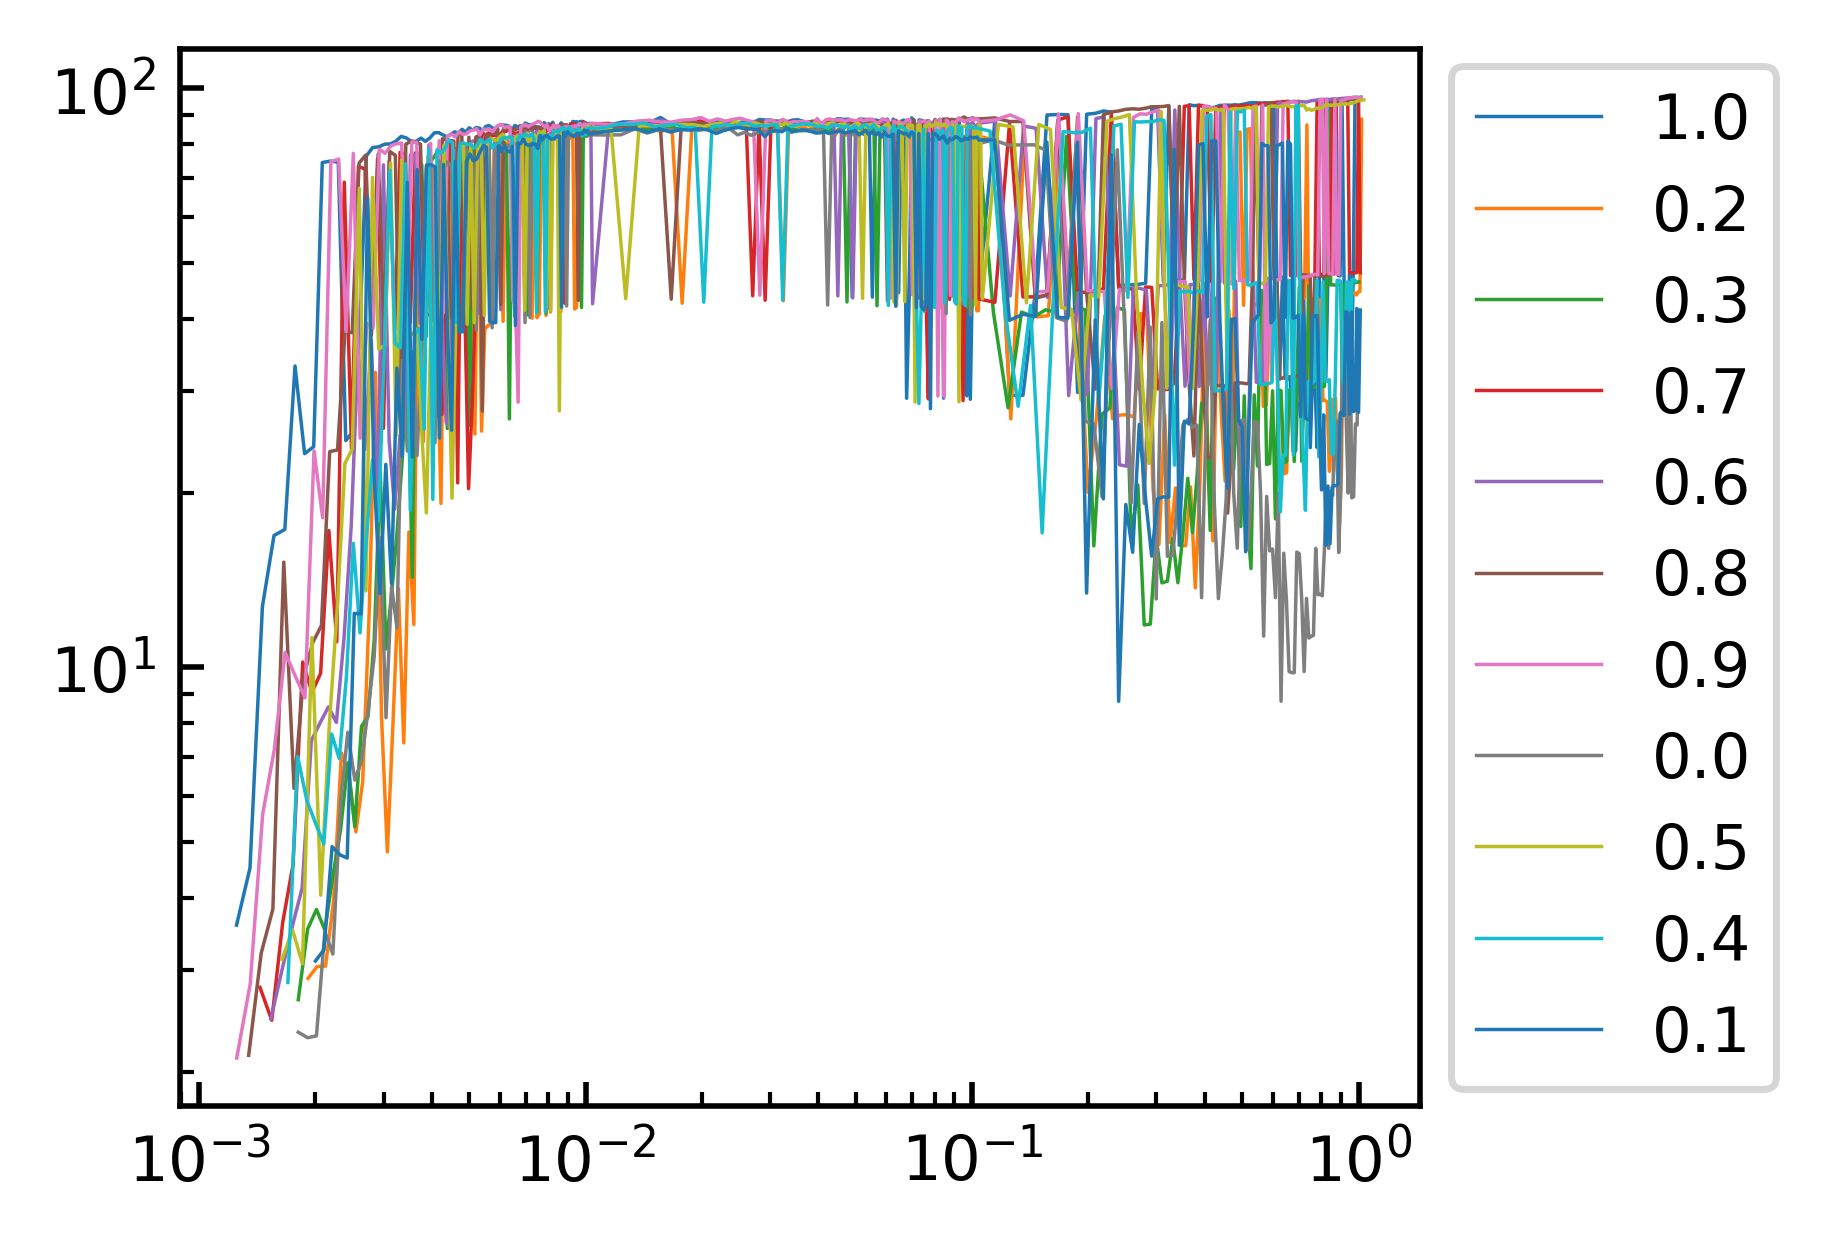

In [18]:
# Let's get the first raw timestep where MCS > 0 and plot it as a function of activity
ltNuc = []
nucInd = []
threshNum = 1
threshVal = 2.0

for i in xrange(len(txtFiles)):
    chk = 0
    for j in xrange(len(all_sims[i]['MCS'])):
        if (all_sims[i]['MCS'][j] * 100.0 / all_sims[i]['Gas_tot'][0]) > threshVal:
            chk += 1
            # We need thresh consecutive timesteps with a non-zero value
            if chk == threshNum:
                ltNuc.append(all_sims[i]['Timestep'][j-9] * 125.0 / all_sims[i]['Timestep'].iloc[-1])
                nucInd.append(j + 2 - threshNum)
                break
        else:
            chk = 0
    
tNuc = pd.Series(ltNuc)
params['tNuc'] = tNuc.values
indNuc = pd.Series(nucInd)
params['nucInd'] = indNuc.values

def line(x, m, b):
    return m * x + b

def lineFit(xdata, ydata):
    popt, pcov = curve_fit(line, xdata, ydata)
    plt.plot(xdata, line(xdata, *popt),
            label='m=%0.2f,\nb=%0.2f' % (popt[0], popt[1]))

lineFit(params['peR'], params['tNuc'])
plt.scatter(params['peR'], params['tNuc'])
plt.xlabel(r'Activity Ratio $\left(\frac{Pe_{slow}}{Pe_{fast}}\right)$')
plt.ylabel(r'Time $(\tau_{B})$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plot all shifted data
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'][params['nucInd'][i]:] * 125.0 / all_sims[i]['Timestep'].iloc[-1]) - (params['tNuc'][i] - params['tNuc'][0]),
                 (all_sims[i]['MCS'][params['nucInd'][i]:] * 100.0 / all_sims[i]['Gas_tot'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plot regime 1 shifted
reg1Stop = 450
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'][params['nucInd'][i]:reg1Stop] * 125.0 / all_sims[i]['Timestep'].iloc[-1]) - (params['tNuc'][i] - params['tNuc'][0]),
                 (all_sims[i]['MCS'][params['nucInd'][i]:reg1Stop] * 100.0 / all_sims[i]['Gas_tot'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
            

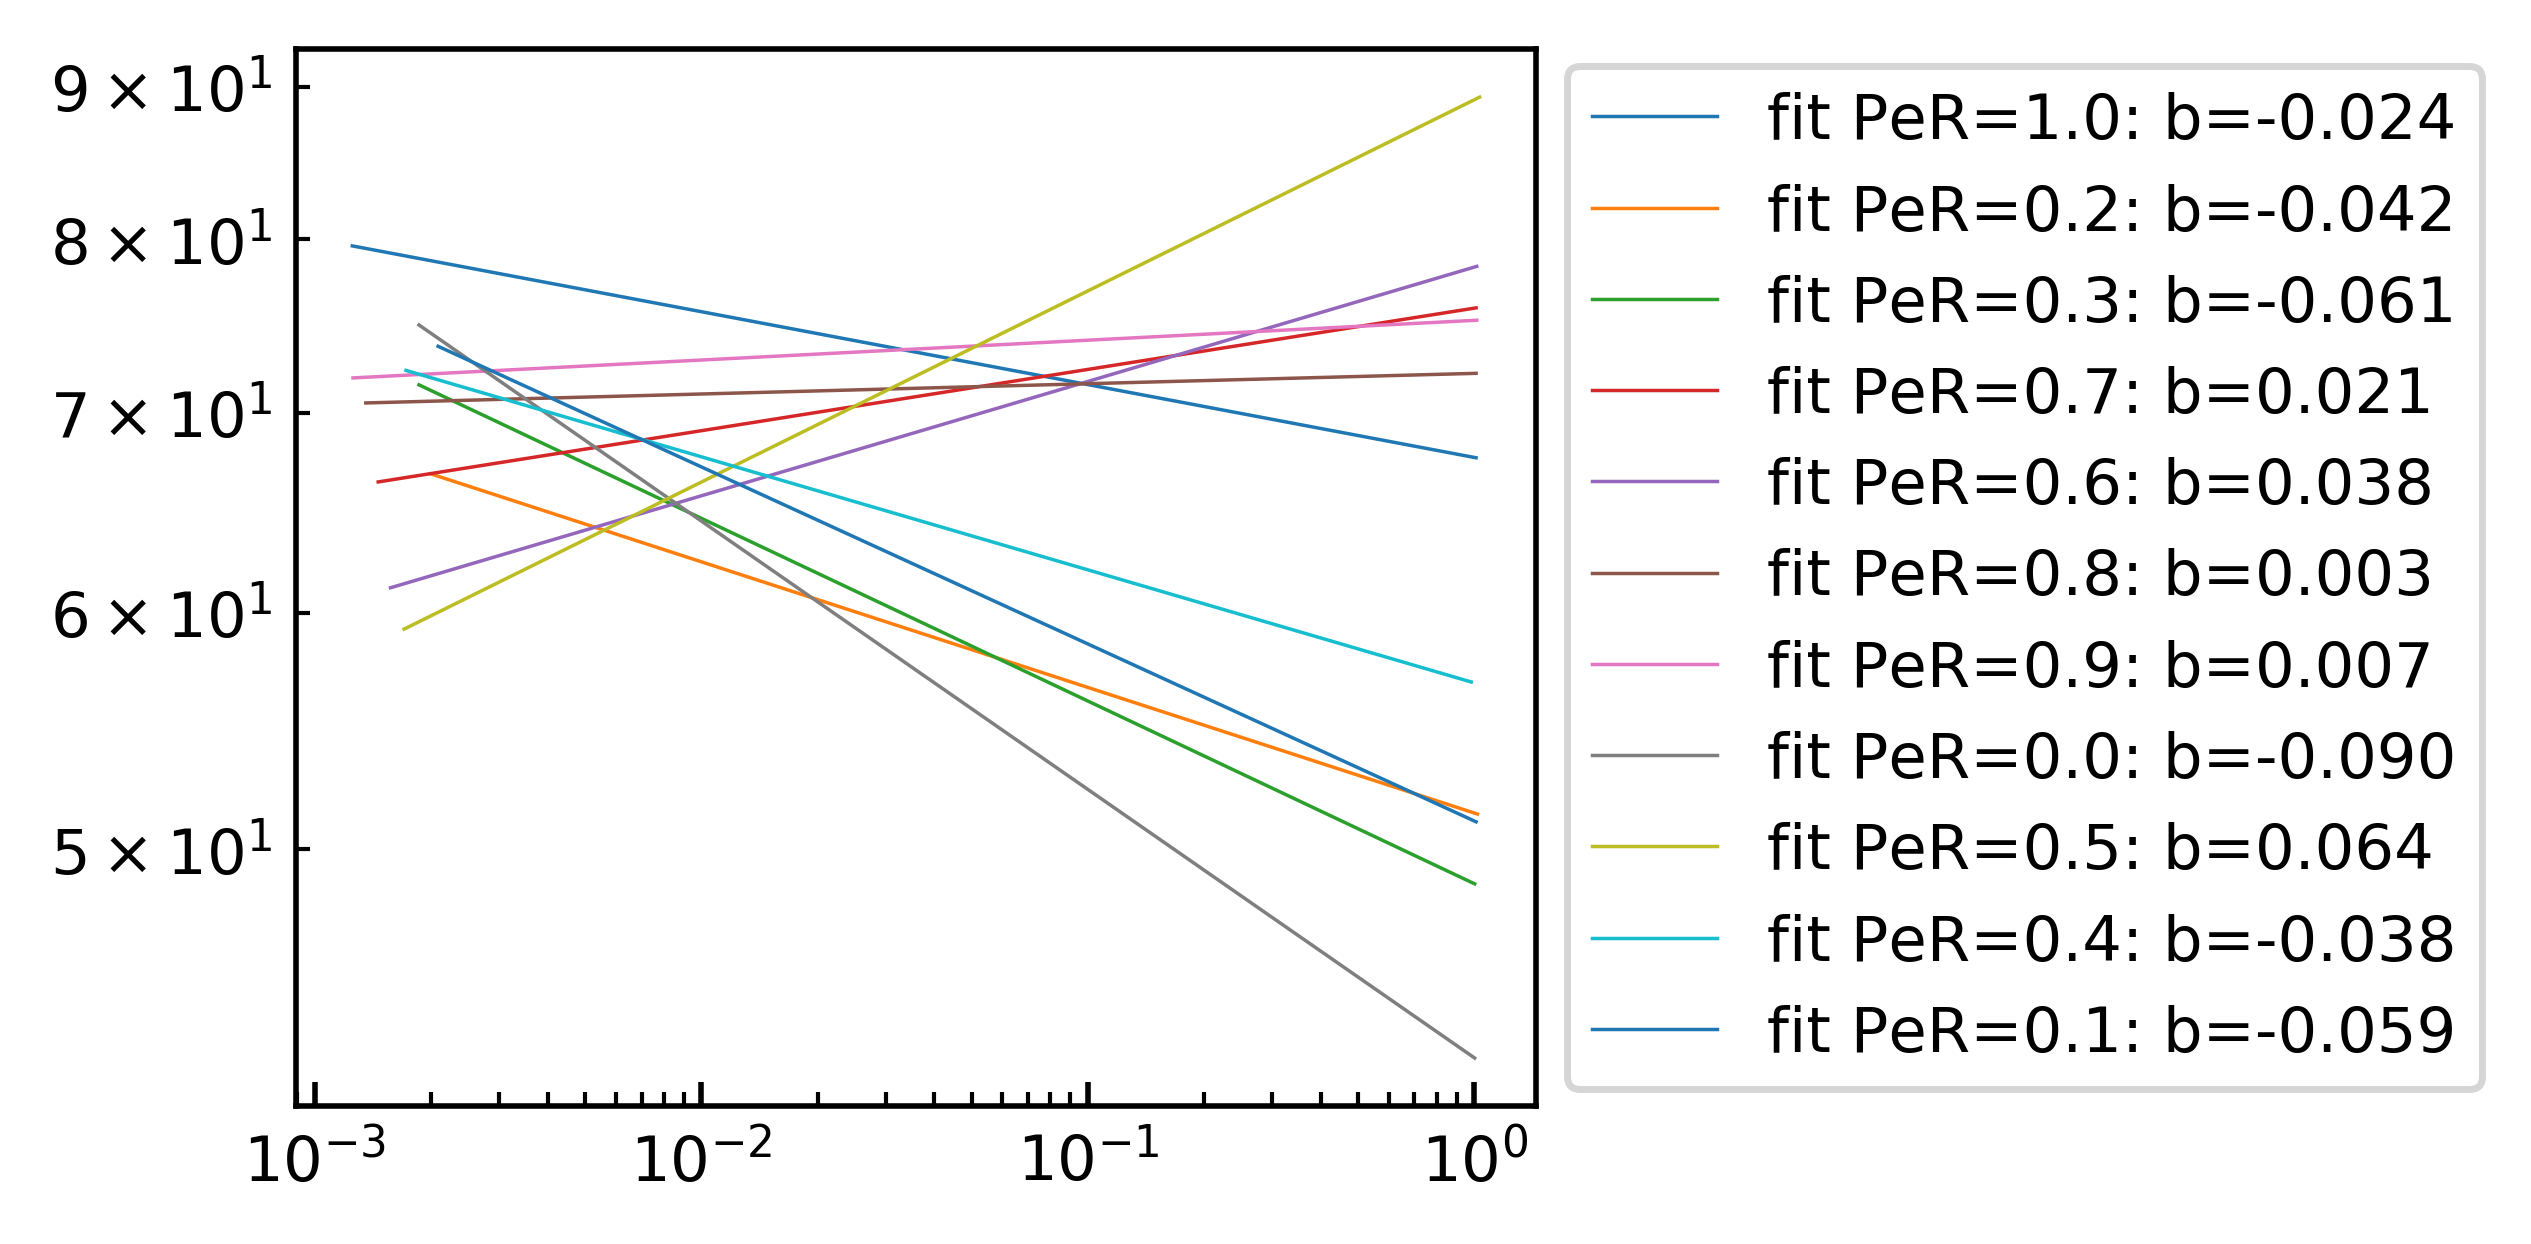

In [19]:
# Plot the fitted data again... this time by using the index of tNuc to set the starting regime

# Let's just fit regime 1...
reg1Stop = 450
# reg2Start = 450
# reg2Stop = -1
for i in xrange(len(txtFiles)):
    # Regime 1
    x1 = (all_sims[i]['Timestep'][params['nucInd'][i]:reg1Stop] * 125.0 / all_sims[i]['Timestep'].iloc[-1])
    y1 = (all_sims[i]['MCS'][params['nucInd'][i]:reg1Stop] * 100.0 / all_sims[i]['Gas_tot'][0])
    plotFit(x1, y1)
    # Regime 2
#     x2 = (all_sims[i]['Timestep'][reg2Start:reg2Stop] * 125.0 / all_sims[i]['Timestep'].iloc[-1])
#     y2 = (all_sims[i]['MCS'][reg2Start:reg2Stop] * 100.0 / all_sims[i]['Gas_tot'][0])
#     plotFit(x2, y2)
# plt.xlim(10**-1 / 2, 10**2)
# plt.ylim(1, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

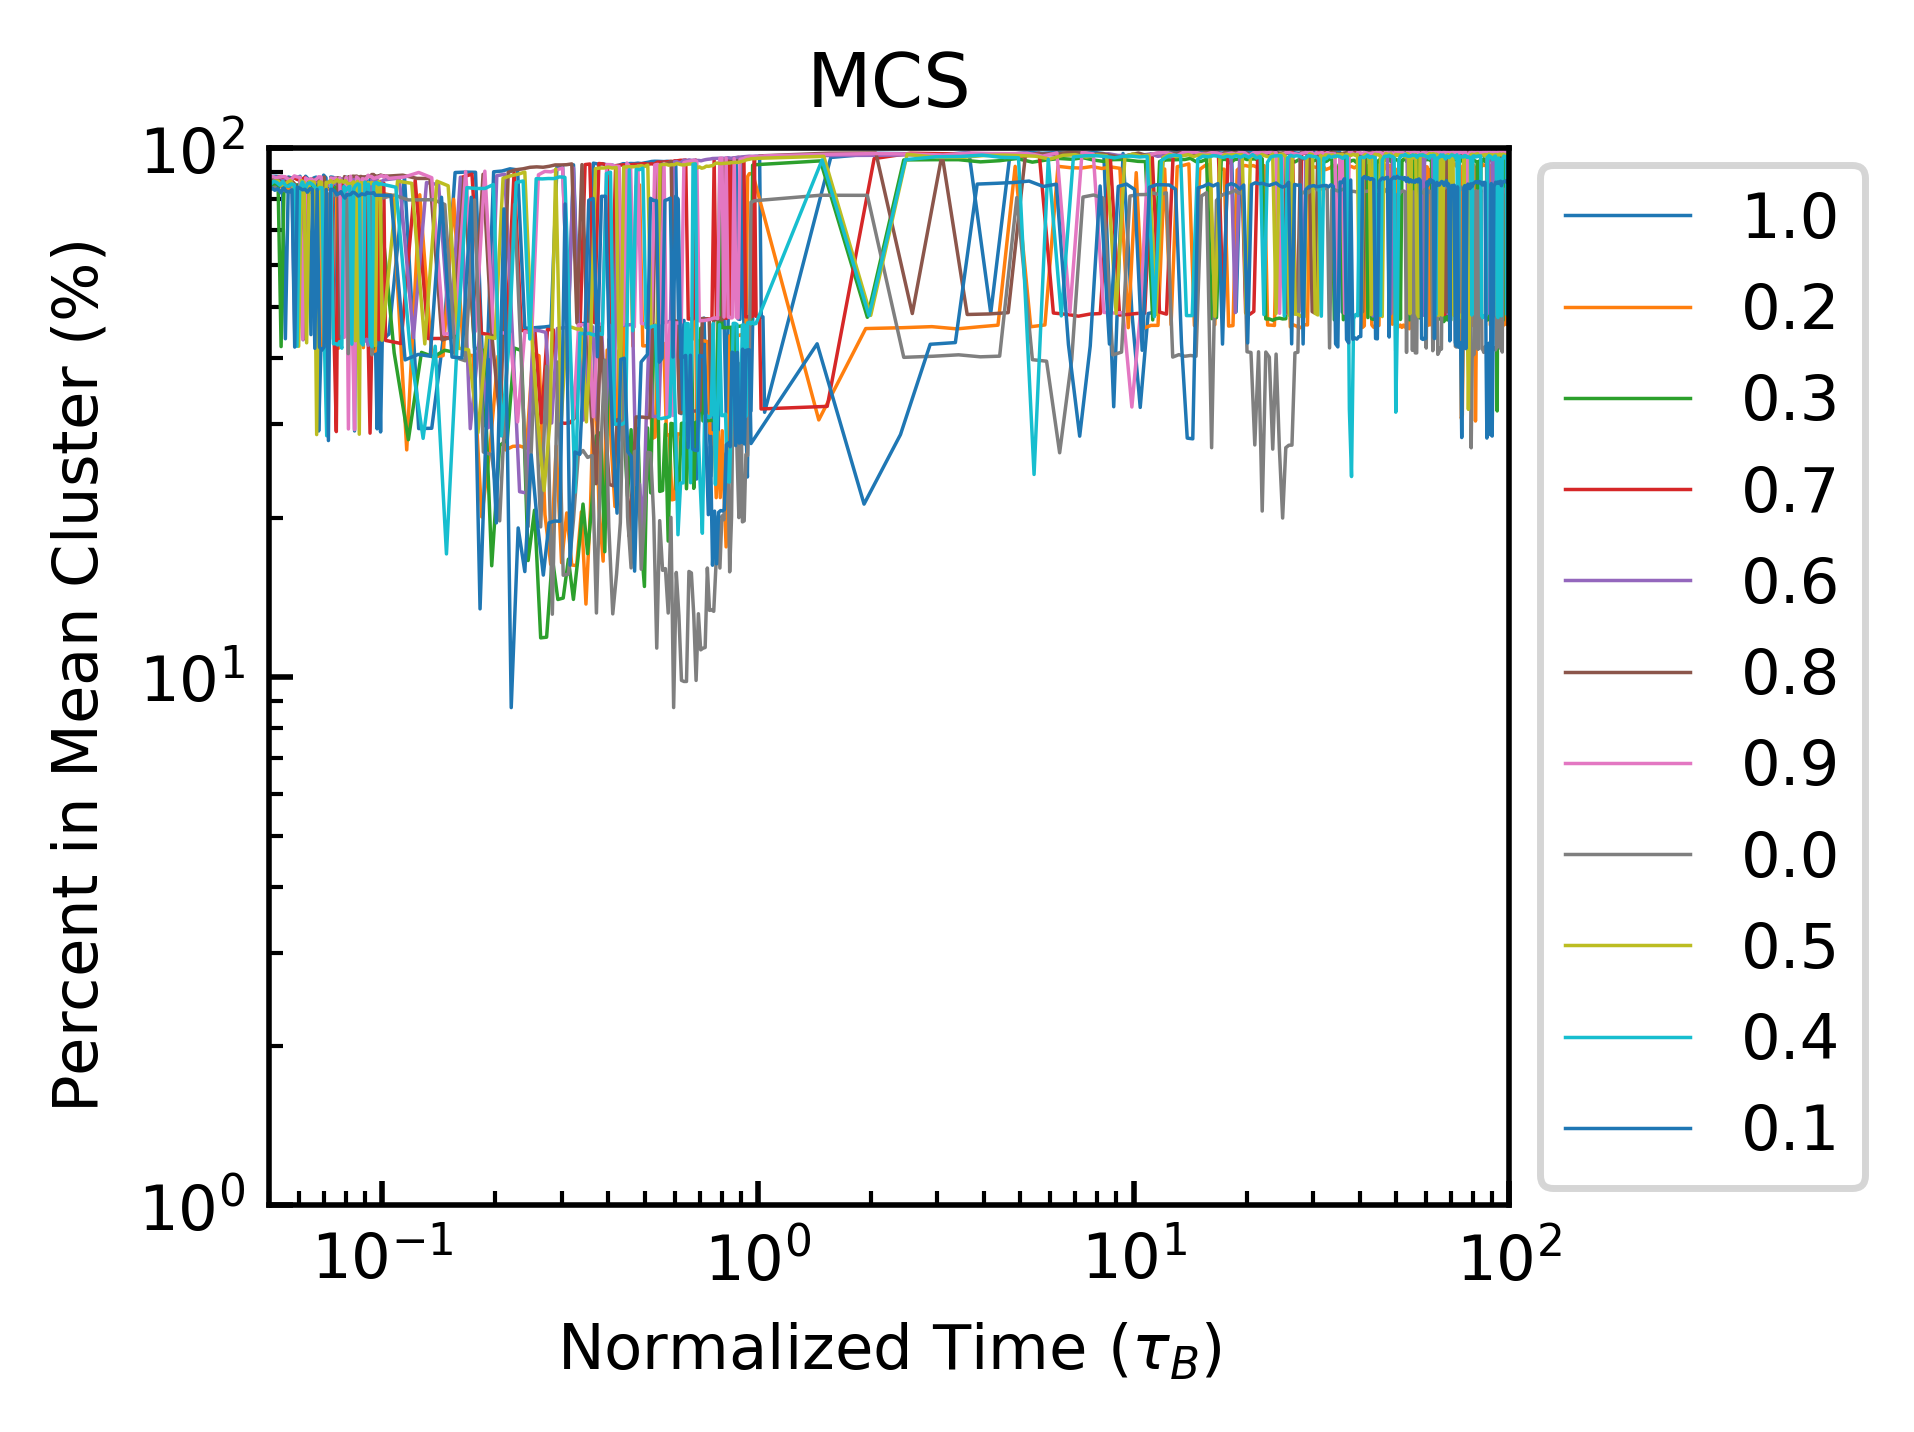

In [20]:
# What factor do I multiply each simulation time by to reach tNuc of PeR = 1?
timeFactor = []
nucFast = min(params['tNuc'])
for i in xrange(len(params['tNuc'])):
    timeFactor.append(params['tNuc'][i] / nucFast)

# Let's replot everything, dividing by the time factor
for i in xrange(len(txtFiles)):
    plt.loglog((all_sims[i]['Timestep'] * 125.0 / all_sims[i]['Timestep'].iloc[-1] / timeFactor[i]),
                 (all_sims[i]['MCS'] * 100.0 / all_sims[i]['Gas_tot'][0]),
                 label=str(params['peR'][i]))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.xlim(10**-1 / 2, 10**2)
plt.ylim(1, 100)
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MCS')
plt.xlabel(r'Normalized Time $(\tau_{B})$')
plt.ylabel(r'Percent in Mean Cluster $(\%)$')
plt.show()